In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_tmp = pd.read_csv("bi_tri_phrases_titles.csv")

/Users/cookiepoon/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_tmp.drop_duplicates(keep ='last',inplace=True)

In [5]:
df_tmp.shape

(48606, 125)

In [6]:
df_tmp.head(10)

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,surveylance,popular_mechanism,systematic_analysis,monetary_compensation,fraudulent_survey,websites,online_surveys,assisting_human_analysts,executing_social_engineering,attacks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,eyetell,victim_device,continuous_movements,victims_keystrokes,touchscreen_device,inferring_pins,lock_patterns,high_efficacy,increasing_threat,typing_sequence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Understanding_Linux_Malware,work,linux_malware,comprehensive_study_attempting,implementation_details,different_architectures,fighting_malicious_programs,time_frame,mirai_botnet,personal_computers_predominantly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sok,research,press__enabled,channels_emanating,spike__emitted,host_computer,plaintext_communications,channel_attacks,channel_reveals_physical,locations,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,futuresmex,physical_layer,chicago_mercantile_exchange,traders_previously_valid,positions,exchanges_economic_viability,availability,abort_absence,actual_trading_days,thomson_reuters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,make_common_security,best_practices_infeasible,practices_shaped,privacy_practices,previously_studied,rely_heavily,case_managers,focus_groups,push_security_practices,united_states,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,humanitarian_organizations_face,robust_technological_safeguards,involves_privileges,challenges__humanitarian,organizations,considering_individual,data_sharing,manmade_disasters,trade_offs,governmental_levels,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,intimate_partner_violence,increasingly_report,legitimate_purpose,child_safety,online_resources,cause_emotional,contexts__ultimately,spyware_used,location__monitor,communications,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,static_methods,static_enforcement_mechanisms,actual_termination,impose_strong_constraints,indirect_termination_sensitive,actual_termination,sound_type,subtle_policy,guard_depends,dynamically_enforced,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,deepsec,decide_trace_equivalence,similar_tools,automated_verification,reachability_properties,subterm_convergent_destructor,rewrite_system,security_evaluation,labelled_bisimilarity_exactly,labelled_bisimilarity,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
input_lst = df_tmp.values.tolist()

In [5]:
# open file and read the content in a list
# add 'moreover', 'around' to the text file 
with open('non_useful_phrases.txt', 'r') as filehandle:
    no_use = [phrase.rstrip() for phrase in filehandle.readlines()]

In [6]:
def remove_nan_nonuse(lst, no_use):
    big_lst = []
    for sublst in lst: 
        sub = []
        for phrase in sublst: 
            # filter NaN; filter non useful phrases; filter any phrase with digits
            if (str(phrase) == 'nan') or (str(phrase) in no_use) or any(map(str.isdigit, phrase)):
                continue
            else: 
                sub.append(phrase)
        big_lst.append(sub)
    return big_lst

In [7]:
input_lst_ = remove_nan_nonuse(input_lst, no_use)

In [8]:
# select 5% of random sample from ngrams 
import random
new_input = np.array(input_lst_)
random_indices = np.random.choice(len(new_input), size = 2430 )
random_list = new_input[random_indices]

/Users/cookiepoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
def flatten_list(big_lst):
    single_lst = []
    for sublst in big_lst:
        reduced_doc = " ".join(sublst)
        single_lst.append(reduced_doc)
    return single_lst

In [10]:
flat_random_list = flatten_list(random_list)

### Hierarchical Clustering

In [11]:
# get tf vectors 
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=1,
                                   max_features=30,
                                   stop_words='english', use_idf=False)
tf = tf_vectorizer.fit_transform(flat_random_list)
tf_feature_names = tf_vectorizer.get_feature_names()
D_tf = tf.todense().tolist()

In [14]:
# get cosine distance based on tf matrix 
from sklearn.metrics.pairwise import cosine_similarity
dist = 1- cosine_similarity(tf)

In [15]:
from sklearn.cluster import AgglomerativeClustering
# distance_threshold: if the distance between two clusters are above the threshold, these clusters will not be merged
def agglomerative_clustering(X, dist_threshold, n_cl):
    model = AgglomerativeClustering(distance_threshold=dist_threshold, n_clusters=n_cl)
    model = model.fit(X)
    return model 

In [95]:
# get a hierarchical clustering without any distance threshold first 
agg_model1 = agglomerative_clustering(dist, 0, None)

In [17]:
def get_cluster_info(agg_model):
    # number of clusters
    print(agg_model.n_clusters_)

    # distance between clusters
    distances = agg_model.distances_
    # get min distance between clusters
    print(distances.min())

    # get max distance between clusters
    print(distances.max())

In [18]:
get_cluster_info(agg_model1)

2430
0.0
104.05513241780304


In [99]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
# plot dendrogram
def plot_dendrogram(model, linkage_name): 
    Z = hierarchy.linkage(model.children_, linkage_name)
    plt.figure(figsize=(20,10))
    dn = hierarchy.dendrogram(Z)
    return Z

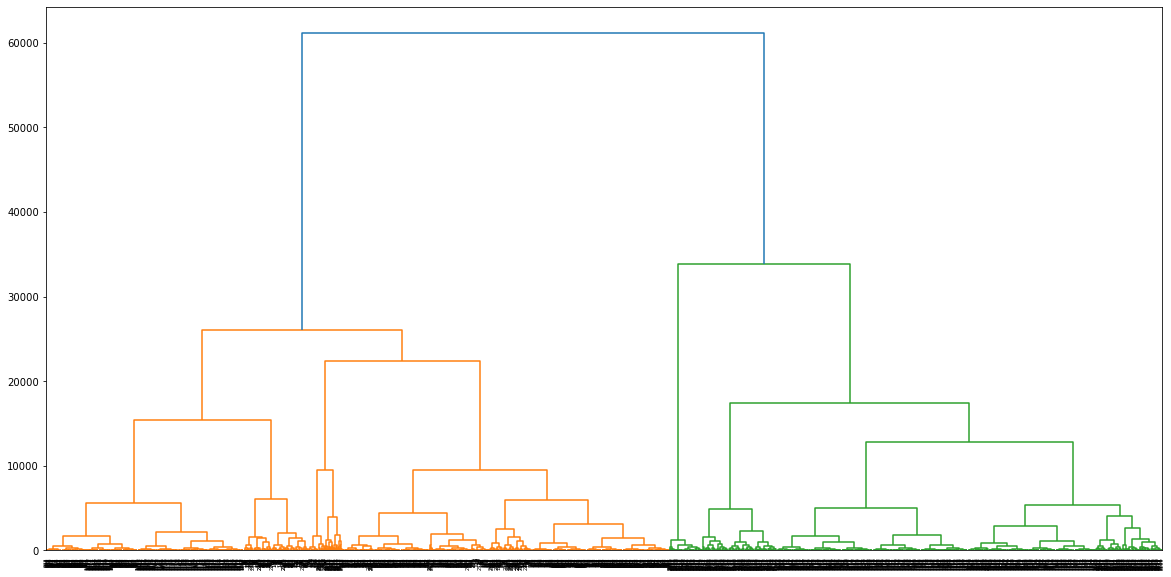

In [20]:
# the labels of leafs are indices of data points
Z1 = plot_dendrogram(agg_model1, 'ward')

In [97]:
# conduct agglomerative clustering with 13 predfined of clusters based on oberservation of dendrogram
from sklearn.cluster import AgglomerativeClustering
def agg_clustering(n, X):
    cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')  
    cl_res = cluster.fit_predict(X)
    return cluster, cl_res

In [24]:
# get each cluster corresponding document counts 
from collections import Counter
def get_cluster_doc_cnt(cluster_idx): 
    tmp = Counter(cluster_idx)
    return tmp

In [23]:
# get each cluster corresponding document index
def get_cluster_doc_index(cluster_index):
    cluster_doc = {}
    for cl in np.unique(cluster_index): 
        cluster_doc[cl] = [i for i in range(len(cluster_index)) if cluster_index[i] == cl]
    return cluster_doc

In [25]:
# get cluster document vectors and cluster document text 
def get_cluster_content(cluster_doc_cnt, cluster_doc_indx, D, corpus, cluster_index):
    # get vectors for each cluster
    cluster_data = {}
    for cl in np.unique(cluster_index): 
        cluster_data[cl] =  [D[i] for i in cluster_doc_indx[cl]]
    # get text content for each cluster 
    content_data = {}
    for cl in np.unique(cluster_index): 
        content_data[cl] = [corpus[i] for i in cluster_doc_indx[cl]]
    return cluster_data, content_data

In [98]:
# get clustering label for each data point 
agg_model, cl_res = agg_clustering(13, dist)

In [94]:

# get agg tf cluster doc index, agg cluster doc cnt, agg tf cluster vectors, agg tf cluster text
agg_tf_cluster_doc_idx = get_cluster_doc_index(cl_res)
agg_tf_cluster_doc_cnt = get_cluster_doc_cnt(cl_res)
agg_tf_cluster_vectors, agg_tf_cluster_text = get_cluster_content(agg_tf_cluster_doc_cnt, agg_tf_cluster_doc_idx, dist, random_list, cl_res)

In [35]:
agg_tf_cluster_doc_cnt

Counter({1: 1954,
         9: 34,
         6: 33,
         12: 22,
         2: 66,
         10: 20,
         3: 40,
         5: 35,
         4: 109,
         7: 27,
         0: 43,
         11: 22,
         8: 25})

In [28]:
# count the frequency of phrases for cluster documents 
from itertools import chain
from collections import Counter
def cluster_phrase_frequency(cluster_text):
    cluster_phrase_freq = {}
    for key in cluster_text.keys():
        cnt_dict = Counter(chain.from_iterable(cluster_text[key]))
        cluster_phrase_freq[key] = cnt_dict
        # res_dict = cluster_phrase_freq.most_common()
    return cluster_phrase_freq

In [29]:
# get most frequent phrases and reamin phrase with frequency > 1
def get_most_frequent_phrase(cluster_phrase_freq):
    cluster_most_common_phrase = {}
    for key in cluster_phrase_freq.keys():
        phrase_freq = cluster_phrase_freq[key].most_common() # list of tuples
        # filter to remain phrase with frequency > 1
        filter_phrase = [t for t in phrase_freq if t[1]>1]
        cluster_most_common_phrase[key] = filter_phrase
    return cluster_most_common_phrase

In [37]:
# get phrase frequencies within each cluster 
agg_cluster_phrase_freq = cluster_phrase_frequency(agg_tf_cluster_text)

In [38]:
# only remain phrase with > 1 frequency within each cluster 
cluster_most_common_phrases = get_most_frequent_phrase(agg_cluster_phrase_freq)

In [40]:
cluster_most_common_phrases[1]

[('moreover', 34),
 ('consumption', 23),
 ('networks', 20),
 ('reduction', 20),
 ('experiments', 19),
 ('problems', 19),
 ('designs', 19),
 ('field_programmablate', 18),
 ('tools', 18),
 ('patterns', 18),
 ('system', 17),
 ('process', 17),
 ('simulations', 17),
 ('embedded_systems', 17),
 ('power', 17),
 ('parallel_applications', 17),
 ('operations', 16),
 ('services', 16),
 ('behavior', 16),
 ('tool', 16),
 ('technology', 16),
 ('structure', 15),
 ('times_faster', 15),
 ('architectures', 14),
 ('devices', 14),
 ('requirements', 14),
 ('etc', 13),
 ('approaches', 13),
 ('power_dissipation', 13),
 ('high_performance_computing', 13),
 ('images', 13),
 ('fault_tolerance', 13),
 ('fault_coverage', 12),
 ('components', 12),
 ('units', 12),
 ('overhead', 12),
 ('memory', 12),
 ('ultra_low_power', 12),
 ('simulation', 12),
 ('functions', 12),
 ('resources', 12),
 ('management', 12),
 ('platform', 12),
 ('main_memory', 12),
 ('supply_voltage', 12),
 ('strategy', 12),
 ('rates', 12),
 ('high_le

In [44]:
# exp_uni_lst = list(filter(lambda x: (x[0].count("_") == 0), cluster_most_common_phrases[1])) 
# print(exp_uni_lst[:3])

In [45]:
# seperate n grams in each cluster
def get_cluster_ngrams(cluster_common_phrases):
    cluster_unigrams = {}
    cluster_bigrams = {}
    cluster_trigrams = {}
    for key in cluster_common_phrases.keys(): 
        phrases_freq = cluster_common_phrases[key]
        cluster_unigrams[key] = list(filter(lambda x: (x[0].count("_") == 0), phrases_freq)) 
        cluster_bigrams[key] = list(filter(lambda x: (x[0].count("_") == 1), phrases_freq)) 
        cluster_trigrams[key] = list(filter(lambda x: (x[0].count("_") > 1), phrases_freq)) 
    return cluster_unigrams, cluster_bigrams, cluster_trigrams

In [46]:
cluster_uni_freq, cluster_bi_freq, cluster_tri_freq = get_cluster_ngrams(cluster_most_common_phrases)

In [50]:
print(len(cluster_uni_freq[1]))
print(cluster_uni_freq.keys())

753
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])


### Histogram with phrase frequencies

In [180]:
import numpy as np
import matplotlib.pyplot as plt
def plot_phrase_freq(example_list, figure_name, label, top_n_words, c):
    word = []
    frequency = []
    top_phrases = sorted(example_list, key=lambda x: x[1], reverse = True)[:top_n_words]
    for i in range(len(top_phrases)):
        word.append(top_phrases[i][0])
        frequency.append(top_phrases[i][1])
        
    indices = np.arange(len(top_phrases))
    plt.bar(indices, frequency, color=c)
    plt.xticks(indices, word, rotation='vertical')
    plt.title(label)
    plt.tight_layout()
    plt.show()
    plt.savefig(figure_name, dpi=200) 

In [181]:
def plot_cluster_phrase_ngrams(cluster_gram_freq, figure_names, titles, top_n_words, c): 
    for i in range(len(cluster_gram_freq.keys())): 
        key =  list(cluster_gram_freq.keys())[i]
        figure_name = figure_names[i]
        title = titles[i]
        phrase_freq = cluster_gram_freq[key]
        plot_phrase_freq(phrase_freq, figure_name, title, top_n_words, c)

In [182]:
def generate_figure_title_names(cluster_ngram_freq, ngram_name, has_sub_cluster, main_cluster): 
    keys = cluster_ngram_freq.keys()
    figure_names = []
    titles = []
    if not has_sub_cluster: 
        for key in keys: 
            figure_names.append("cluster" + str(key) + ngram_name + "_frequency.png" )
            titles.append("cluster" + str(key) + ngram_name + "_frequency")
    else: 
        for key in keys: 
            figure_names.append("cluster_" + main_cluster + str(key) + ngram_name + "_frequency.png" )
            titles.append("cluster_" + main_cluster + str(key) + ngram_name + "_frequency")
    return figure_names, titles

In [183]:
uni_fig_names, uni_titles = generate_figure_title_names(cluster_uni_freq, "_unigram", False, None)
bi_fig_names, bi_titles = generate_figure_title_names(cluster_bi_freq, "_bigram", False, None)
tri_fig_names, tri_titles = generate_figure_title_names(cluster_tri_freq, "_trigram", False, None)

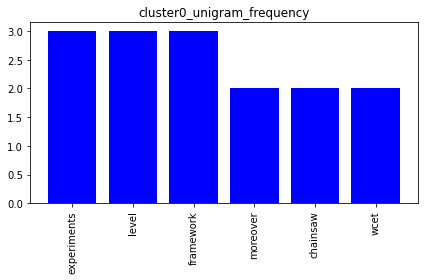

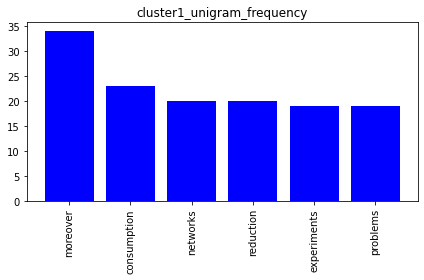

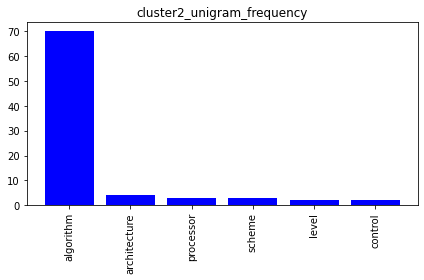

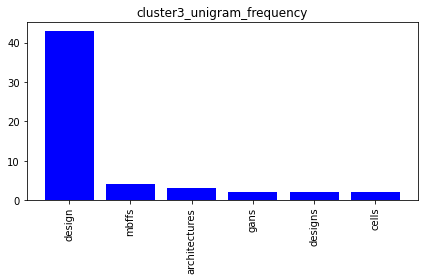

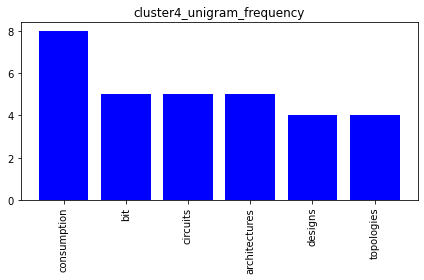

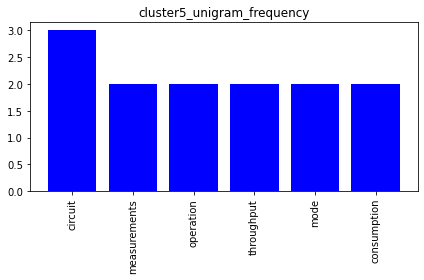

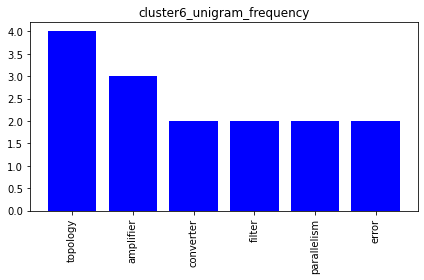

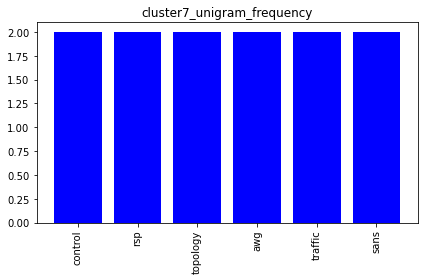

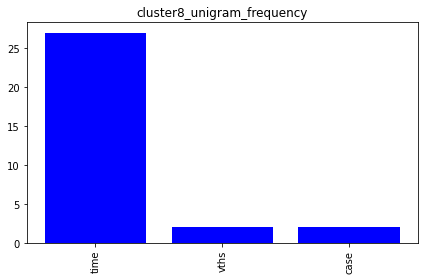

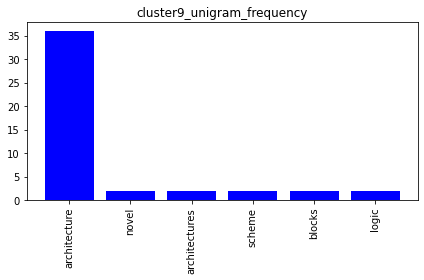

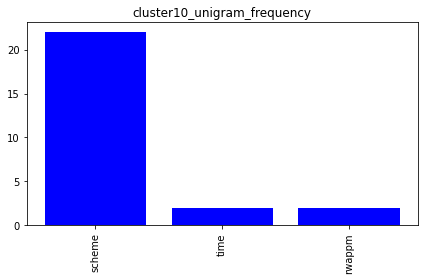

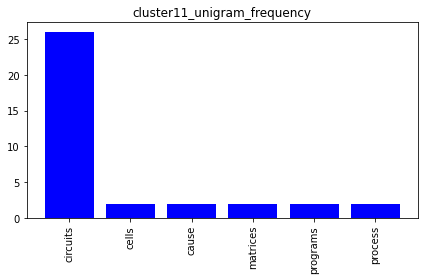

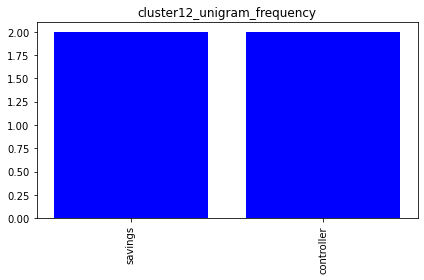

<Figure size 432x288 with 0 Axes>

In [184]:
# plot unigrams phrase frequency in each cluster top 6 phrases in each cluster 
plot_cluster_phrase_ngrams(cluster_uni_freq, uni_fig_names, uni_titles, 6, 'b')

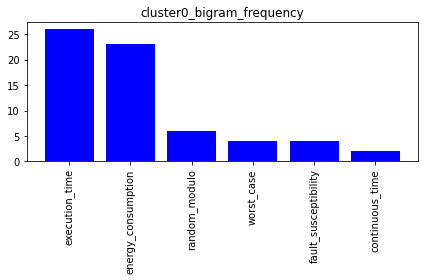

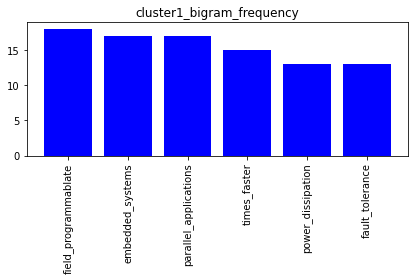

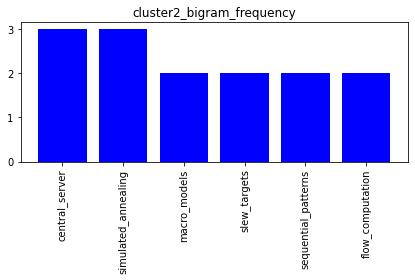

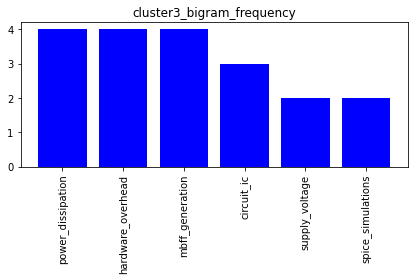

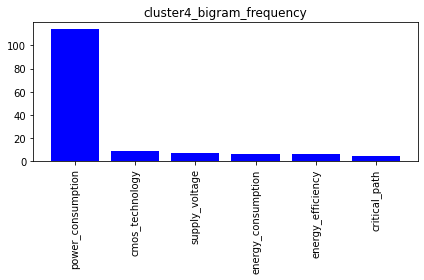

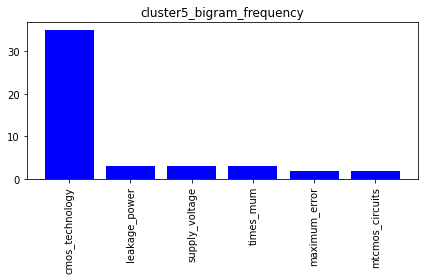

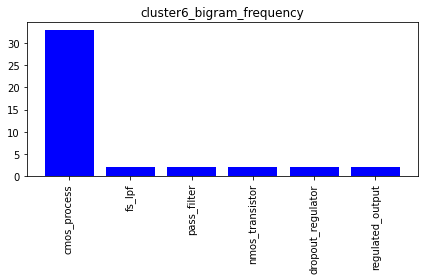

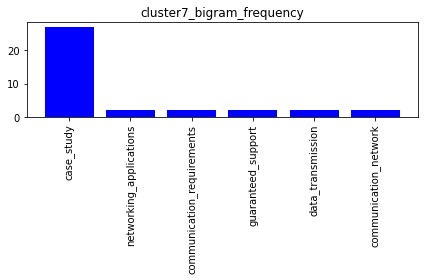

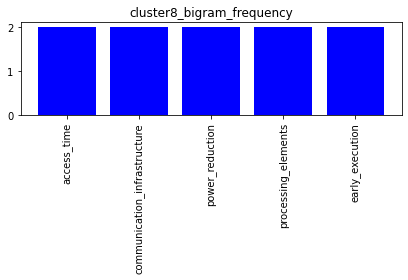

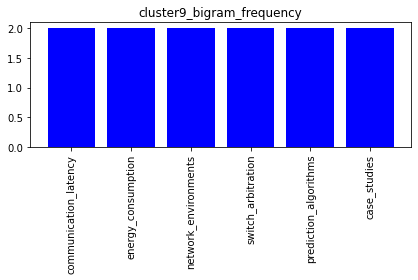

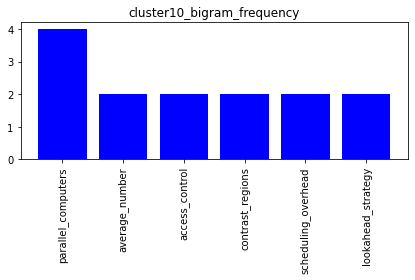

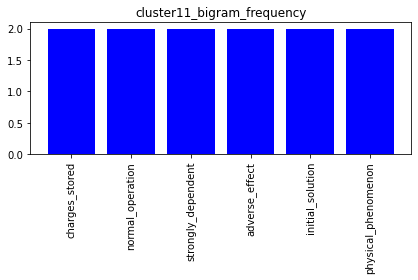

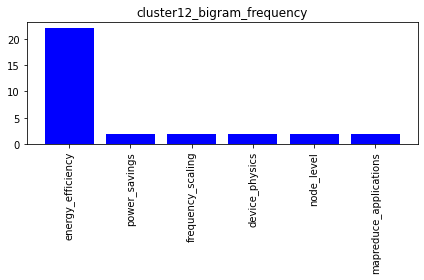

<Figure size 432x288 with 0 Axes>

In [91]:
# plot bigram phrase frequency in each cluster top 6 phrases in each cluster 
plot_cluster_phrase_ngrams(cluster_bi_freq, bi_fig_names, bi_titles, 6, 'b')

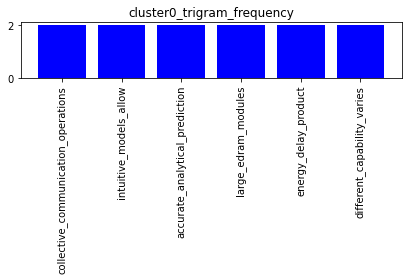

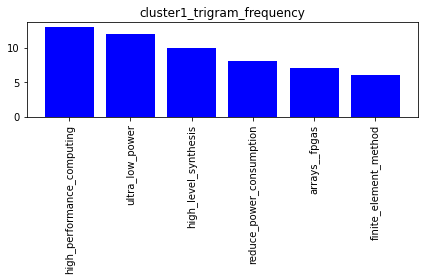

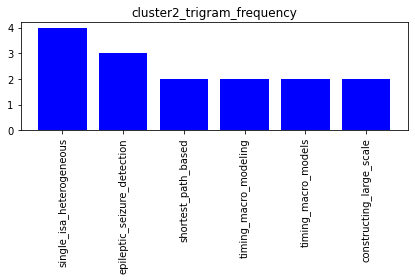

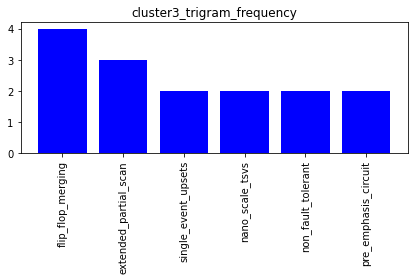

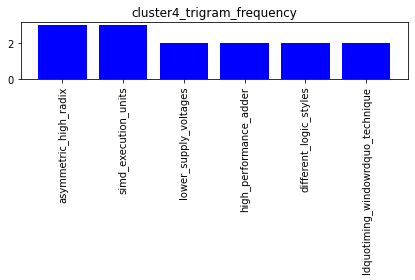

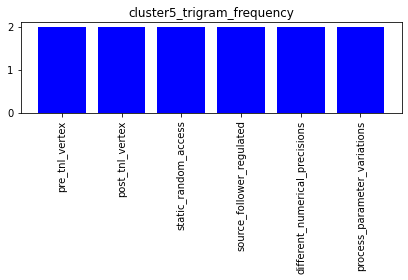

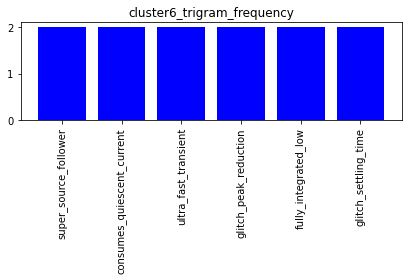

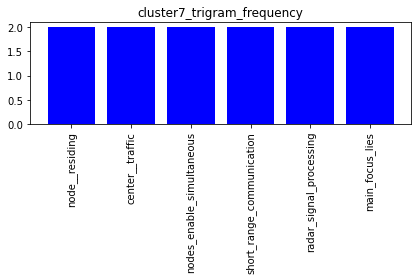

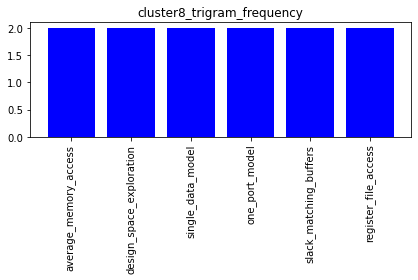

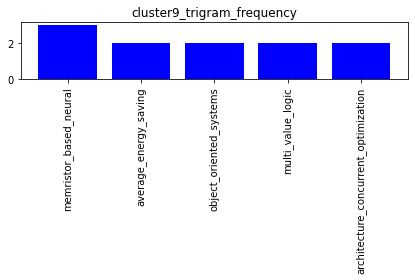

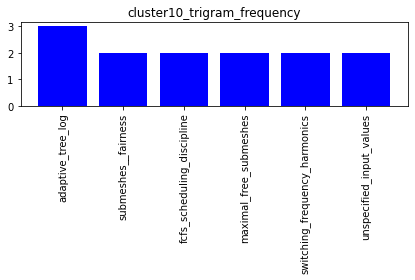

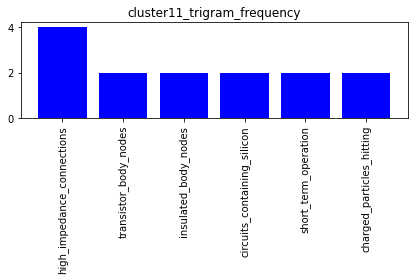

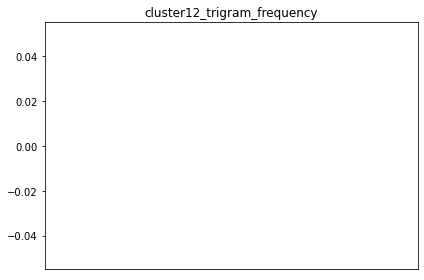

<Figure size 432x288 with 0 Axes>

In [92]:
# plot triigram phrase frequency in each cluster top 6 phrases in each cluster 
plot_cluster_phrase_ngrams(cluster_tri_freq, tri_fig_names, tri_titles, 6, 'b')

### Analyze on subclusters

- plot dendrogram after reclusterings
- get subclusters of linkage matrix
- plot subtree of subclusters

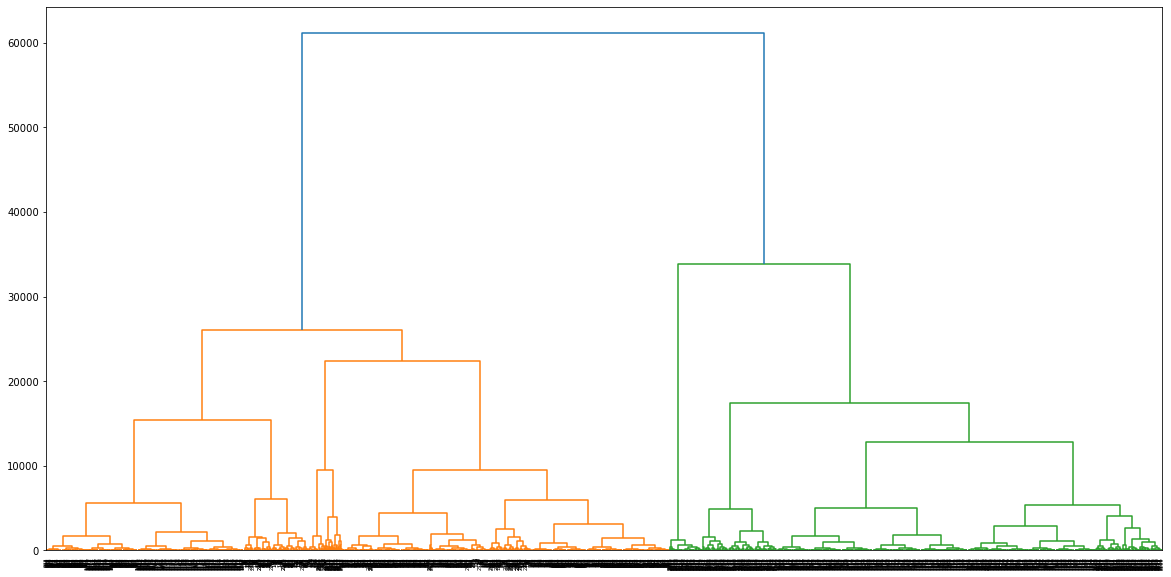

In [100]:
Z2 = plot_dendrogram(agg_model, 'ward')

In [109]:
def plot_subtree_dendrogram(cluster_dist, linkage_name): 
    # Z = hierarchy.linkage(model.children_, linkage_name)
    plt.figure(figsize=(20,10))
    Z = ward(cluster_dist)
    dn = hierarchy.dendrogram(Z)
    return Z

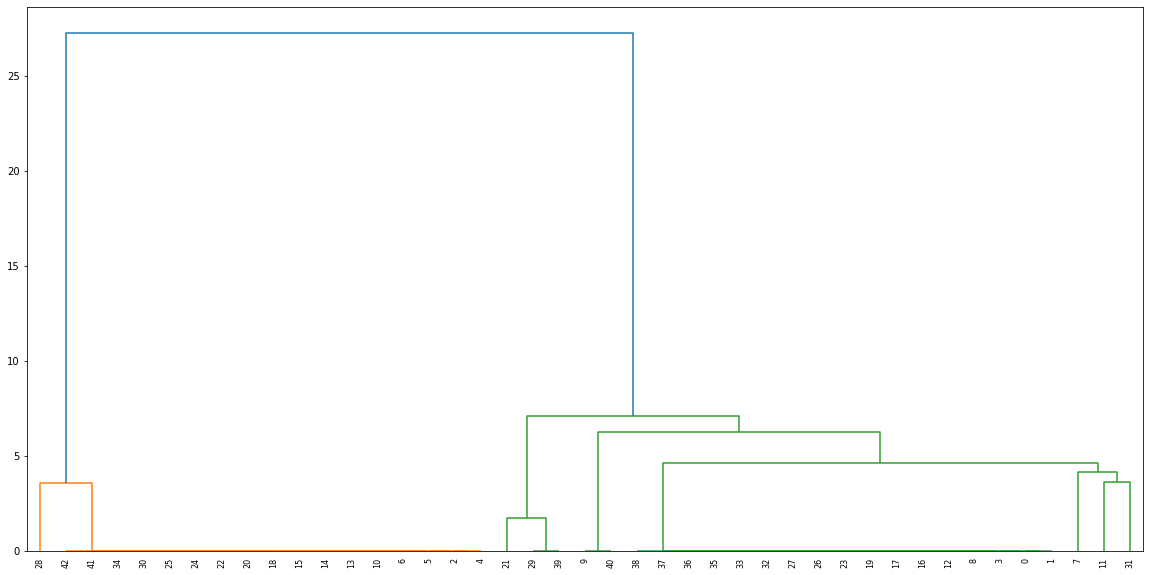

In [113]:
# plot subtree for cluster 0
Z0 = plot_subtree_dendrogram(agg_tf_cluster_vectors[0], "ward")

In [139]:
agg_model_cl0, cl0_res = agg_clustering(4, agg_tf_cluster_vectors[0])

In [120]:
# from scipy import cluster
# def cut_tree(cluster_vectors, arr_n_clusters):
    # Z = cluster.hierarchy.ward(cluster_vectors)
    # cutree = cluster.hierarchy.cut_tree(Z, n_clusters = arr_n_clusters)
    # return cutree

In [138]:
# threshold around 4, get 3 cluster
# cutree_0 = cut_tree(agg_tf_cluster_vectors[0],[4,7])

In [134]:
# get agg tf cluster doc index, agg cluster doc cnt, agg tf cluster vectors, agg tf cluster text
def get_agg_cluster_data(cl_res):
    agg_tf_cluster_doc_idx = get_cluster_doc_index(cl_res)
    agg_tf_cluster_doc_cnt = get_cluster_doc_cnt(cl_res)
    agg_tf_cluster_vectors, agg_tf_cluster_text = get_cluster_content(agg_tf_cluster_doc_cnt, agg_tf_cluster_doc_idx, dist, random_list, cl_res)
    return agg_tf_cluster_doc_idx, agg_tf_cluster_doc_cnt, agg_tf_cluster_vectors, agg_tf_cluster_text

In [140]:
# cutree_0_res = get_data_cluster_label(cutree_0)
cluster_0_doc_idx, cluster_0_doc_cnt, cluster_0_vectors, cluster_0_text = get_agg_cluster_data(cl0_res)

In [141]:
cluster_0_doc_cnt

Counter({0: 20, 1: 18, 3: 2, 2: 3})

In [142]:
def get_most_common_phrases_freq(agg_tf_cluster_text):
    agg_cluster_phrase_freq = cluster_phrase_frequency(agg_tf_cluster_text)
    cluster_most_common_phrases = get_most_frequent_phrase(agg_cluster_phrase_freq)
    return cluster_most_common_phrases

In [162]:
cluster_0_most_common_phrases = get_most_common_phrases_freq(cluster_0_text)

In [165]:
cluster0_uni_freq, cluster0_bi_freq, cluster0_tri_freq = get_cluster_ngrams(cluster_0_most_common_phrases)

In [ ]:
# generate_figure_title_names(cluster_ngram_freq, ngram_name, has_sub_cluster, main_cluster)
# main cluster is a string 

In [188]:
def get_ngrams_fig_names_titles(cluster_uni_freq,cluster_bi_freq, cluster_tri_freq, has_subcluster, main_cluster):
    uni_fig_names, uni_titles = generate_figure_title_names(cluster_uni_freq, "_unigram", has_subcluster, main_cluster)
    bi_fig_names, bi_titles = generate_figure_title_names(cluster_bi_freq, "_bigram", has_subcluster, main_cluster)
    tri_fig_names, tri_titles = generate_figure_title_names(cluster_tri_freq, "_trigram", has_subcluster, main_cluster)
    return uni_fig_names, uni_titles, bi_fig_names, bi_titles, tri_fig_names, tri_titles

In [189]:
cl0_uni_fig_names, cl0_uni_titles, cl0_bi_fig_names, cl0_bi_titles, cl0_tri_fig_names, cl0_tri_titles = get_ngrams_fig_names_titles(cluster0_uni_freq,cluster0_bi_freq, cluster0_tri_freq,True, "0.")

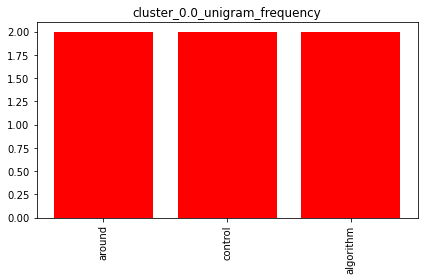

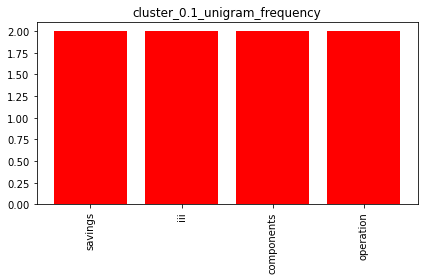

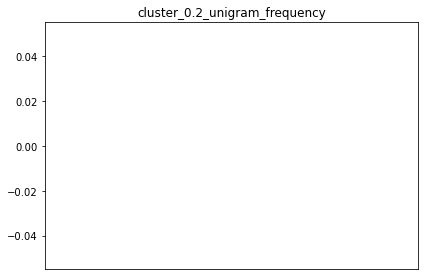

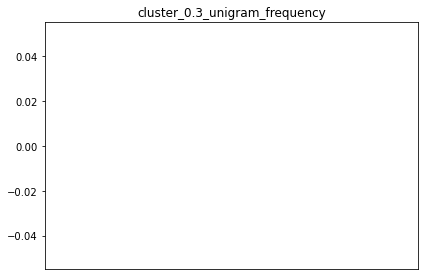

<Figure size 432x288 with 0 Axes>

In [185]:
# cluster 0 subclusters unigrams
plot_cluster_phrase_ngrams(cluster0_uni_freq, cl0_uni_fig_names, cl0_uni_titles, 6, 'r')

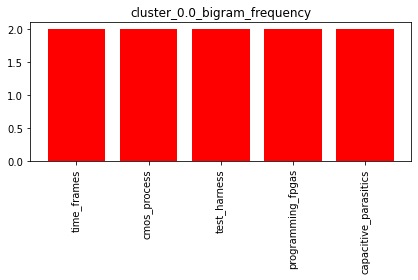

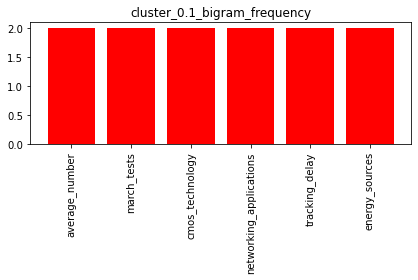

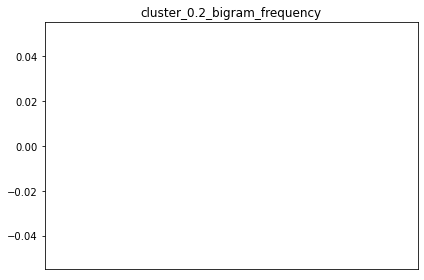

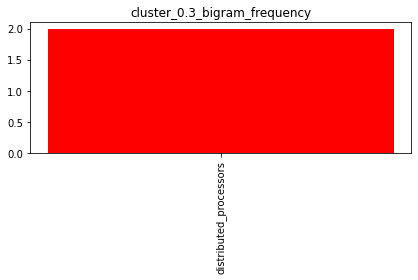

<Figure size 432x288 with 0 Axes>

In [186]:
# cluster 0 bigrams frequency subclusters
plot_cluster_phrase_ngrams(cluster0_bi_freq, cl0_bi_fig_names, cl0_bi_titles, 6, 'r')

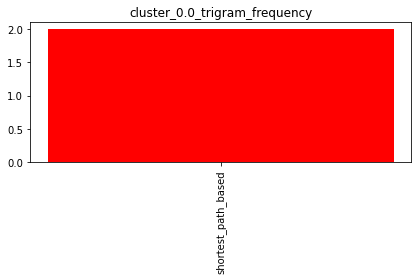

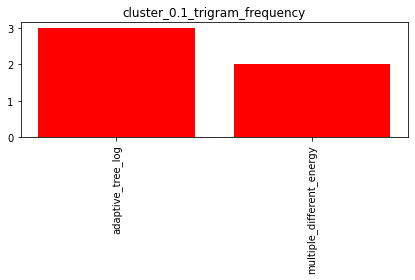

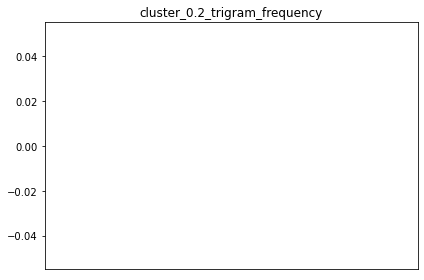

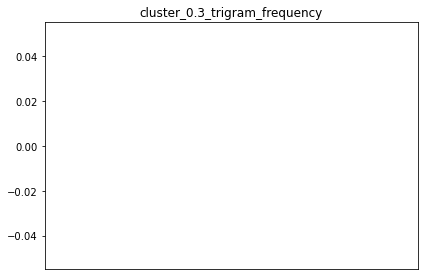

<Figure size 432x288 with 0 Axes>

In [187]:
# cluster 0 subclusters trigrams 
plot_cluster_phrase_ngrams(cluster0_tri_freq, cl0_tri_fig_names, cl0_tri_titles, 6, 'r')

#### cluster 1

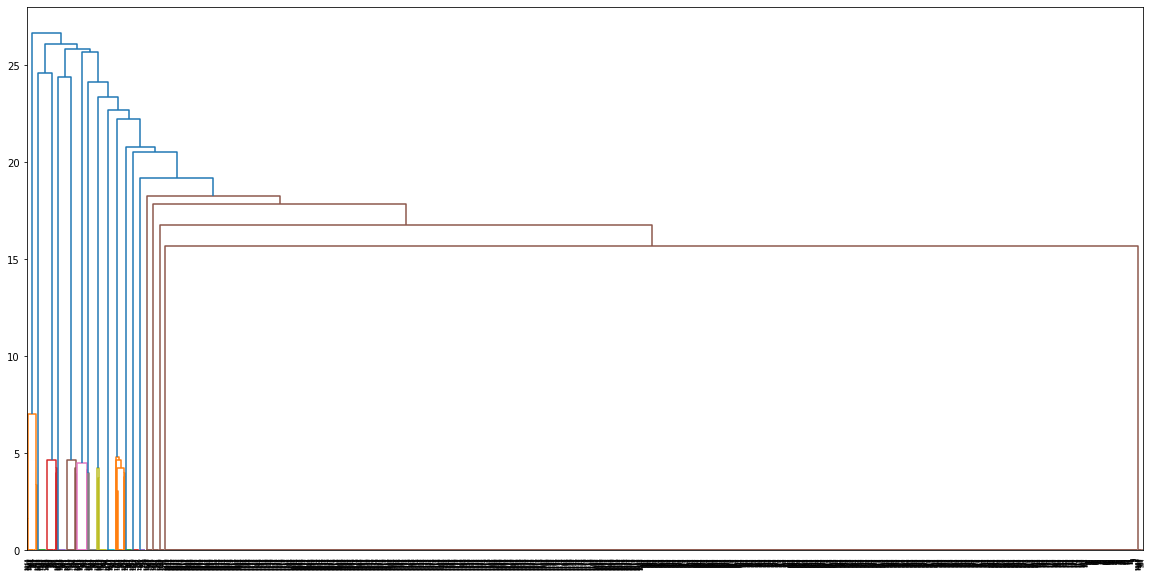

In [232]:
Z1 = plot_subtree_dendrogram(agg_tf_cluster_vectors[1], "ward")

In [233]:
# threshold around 24, around 8 clusters 
agg_model_cl1, cl1_res = agg_clustering(8, agg_tf_cluster_vectors[1])
cluster_1_doc_idx, cluster_1_doc_cnt, cluster_1_vectors, cluster_1_text = get_agg_cluster_data(cl1_res)
cluster_1_most_common_phrases = get_most_common_phrases_freq(cluster_1_text)
cluster1_uni_freq, cluster1_bi_freq, cluster1_tri_freq = get_cluster_ngrams(cluster_1_most_common_phrases)
cl1_uni_fig_names, cl1_uni_titles, cl1_bi_fig_names, cl1_bi_titles, cl1_tri_fig_names, cl1_tri_titles = get_ngrams_fig_names_titles(cluster1_uni_freq,cluster1_bi_freq, cluster1_tri_freq,True, "1.")

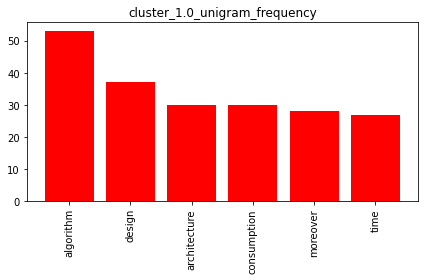

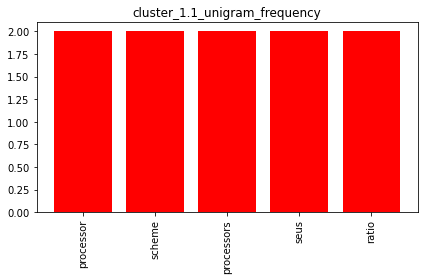

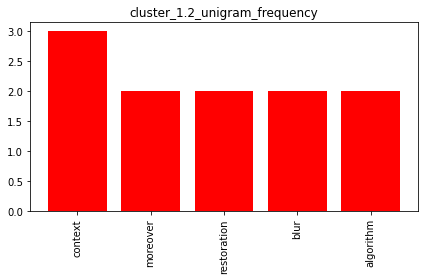

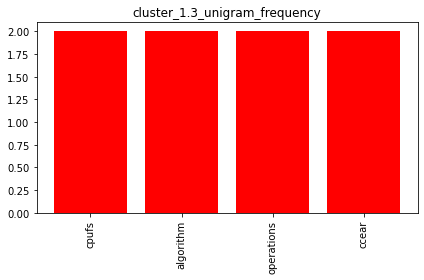

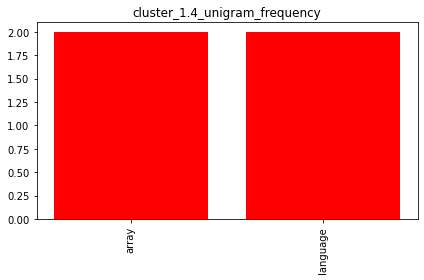

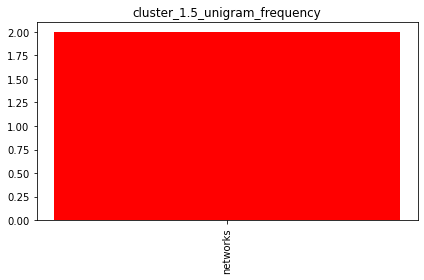

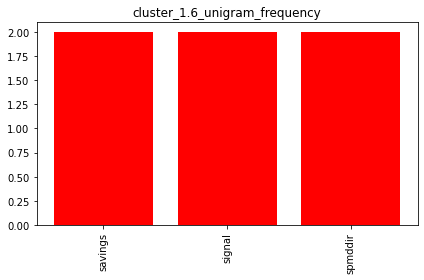

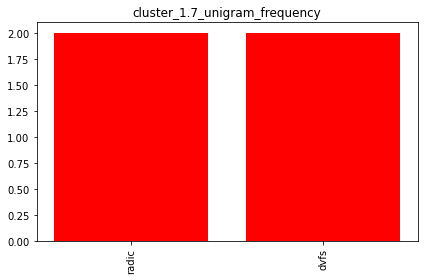

<Figure size 432x288 with 0 Axes>

In [234]:
# cluster 1 sub clusters unigrams
plot_cluster_phrase_ngrams(cluster1_uni_freq, cl1_uni_fig_names, cl1_uni_titles, 6, 'r')

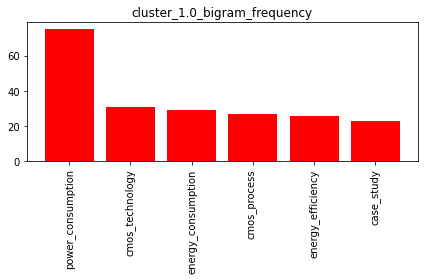

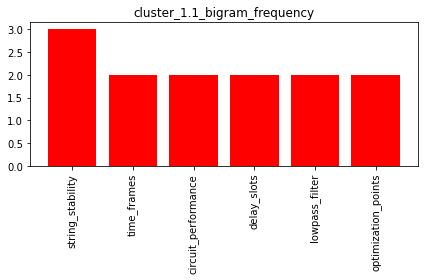

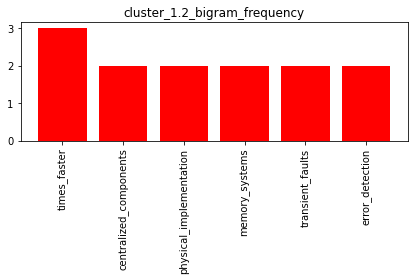

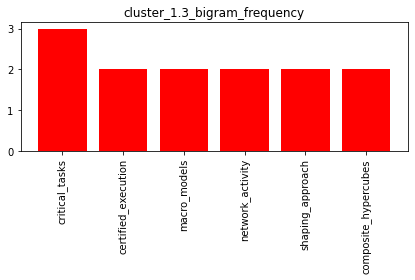

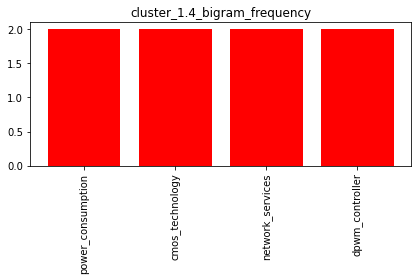

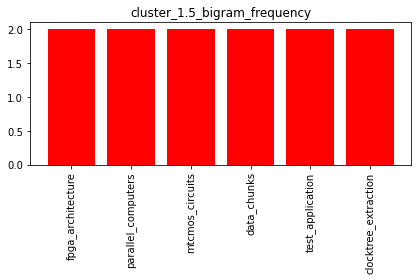

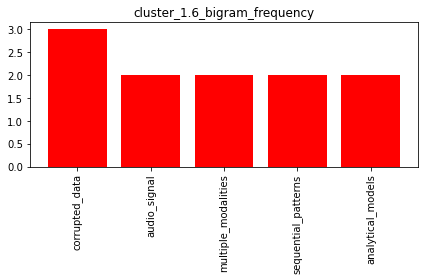

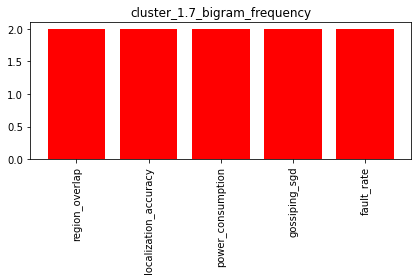

<Figure size 432x288 with 0 Axes>

In [235]:
# cluster 1 sub clusters bigrams
plot_cluster_phrase_ngrams(cluster1_bi_freq, cl1_bi_fig_names, cl1_bi_titles, 6, 'r')

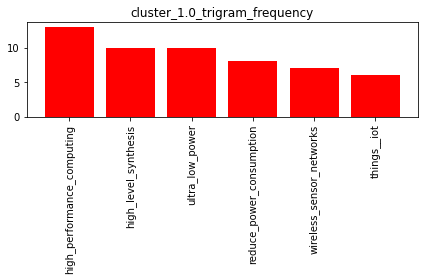

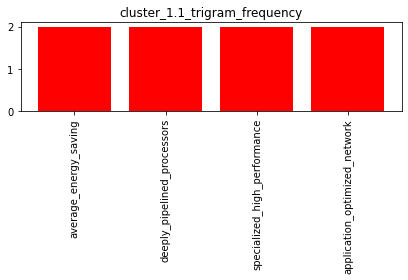

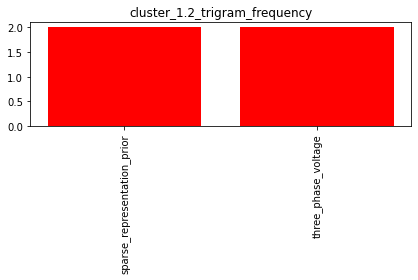

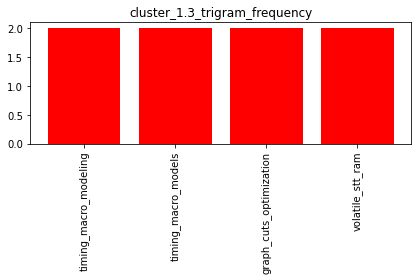

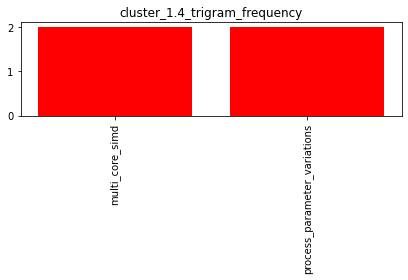

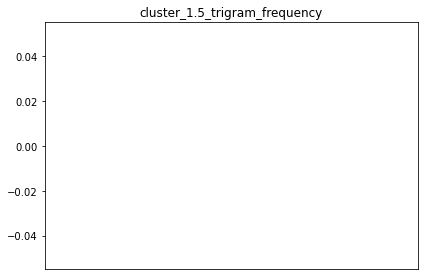

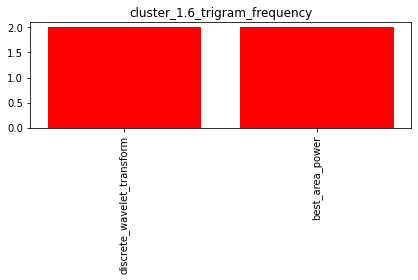

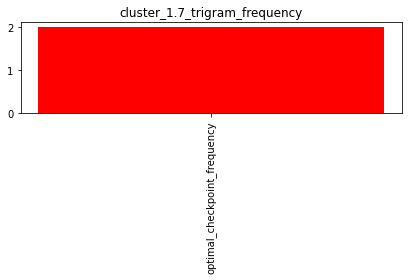

<Figure size 432x288 with 0 Axes>

In [236]:
# cluster 1 sub clusters trigrams
plot_cluster_phrase_ngrams(cluster1_tri_freq, cl1_tri_fig_names, cl1_tri_titles, 6, 'r')

#### cluster2

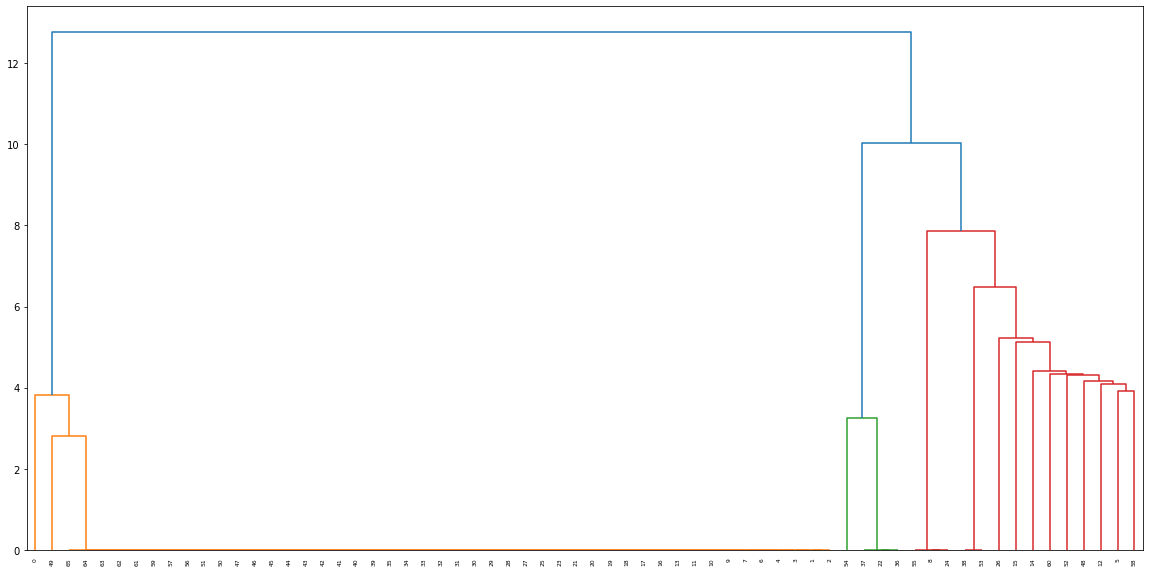

In [237]:
Z2 = plot_subtree_dendrogram(agg_tf_cluster_vectors[2], "ward")

In [238]:
# threshold around 7, around 4 clusters 
agg_model_cl2, cl2_res = agg_clustering(4, agg_tf_cluster_vectors[1])
cluster_2_doc_idx, cluster_2_doc_cnt, cluster_2_vectors, cluster_2_text = get_agg_cluster_data(cl2_res)
cluster_2_most_common_phrases = get_most_common_phrases_freq(cluster_2_text)
cluster2_uni_freq, cluster2_bi_freq, cluster2_tri_freq = get_cluster_ngrams(cluster_2_most_common_phrases)
cl2_uni_fig_names, cl2_uni_titles, cl2_bi_fig_names, cl2_bi_titles, cl2_tri_fig_names, cl2_tri_titles = get_ngrams_fig_names_titles(cluster2_uni_freq,cluster2_bi_freq, cluster2_tri_freq,True, "2.")

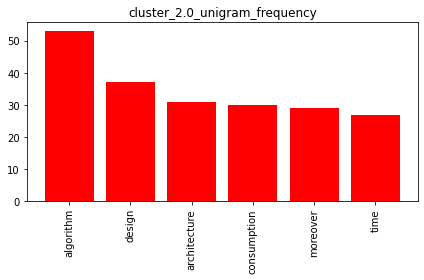

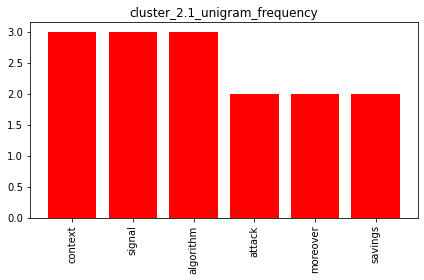

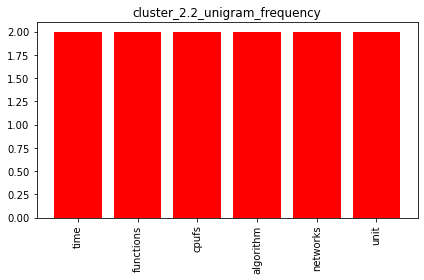

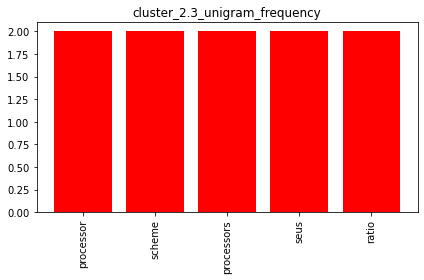

<Figure size 432x288 with 0 Axes>

In [239]:
# cluster 2 sub clusters unigrams
plot_cluster_phrase_ngrams(cluster2_uni_freq, cl2_uni_fig_names, cl2_uni_titles, 6, 'r')

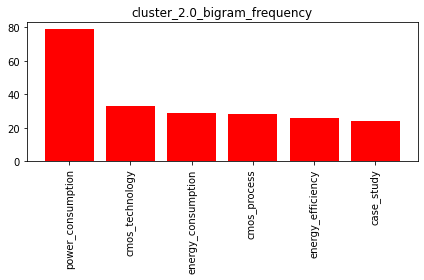

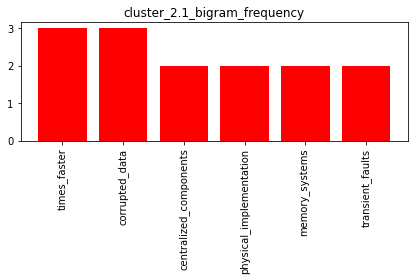

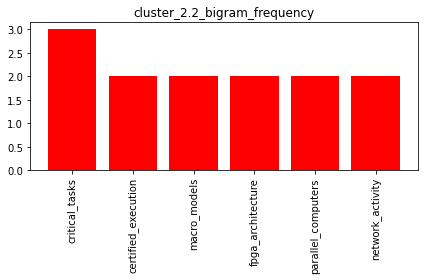

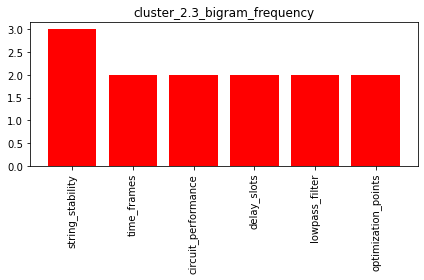

<Figure size 432x288 with 0 Axes>

In [240]:
# cluster 2 sub clusters bigrams
plot_cluster_phrase_ngrams(cluster2_bi_freq, cl2_bi_fig_names, cl2_bi_titles, 6, 'r')

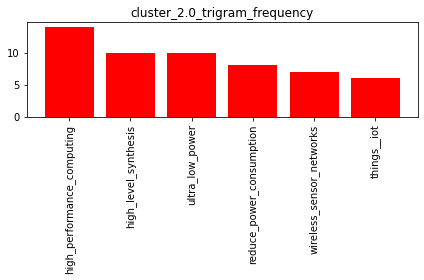

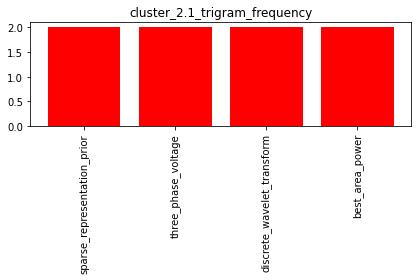

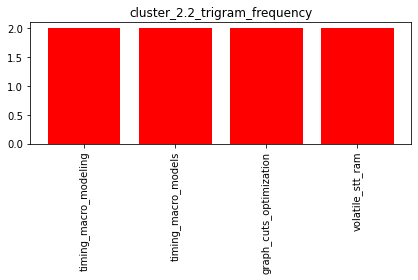

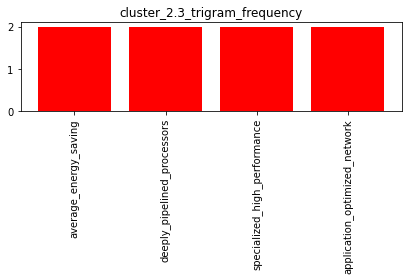

<Figure size 432x288 with 0 Axes>

In [241]:
# cluster 2 sub clusters trigrams
plot_cluster_phrase_ngrams(cluster2_tri_freq, cl2_tri_fig_names, cl2_tri_titles, 6, 'r')

#### cluster 3

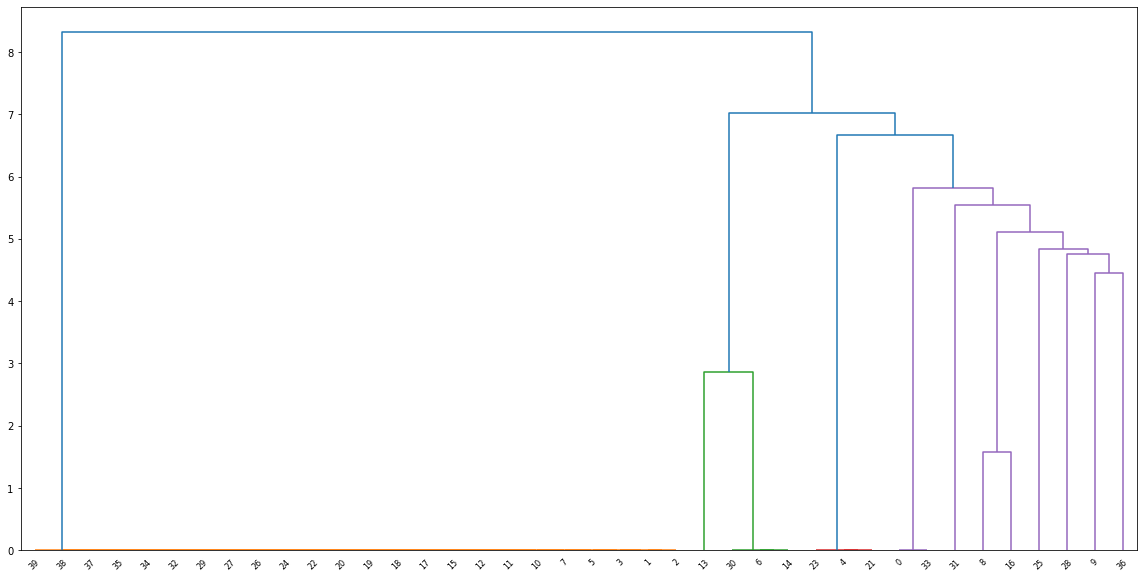

In [242]:
Z3 = plot_subtree_dendrogram(agg_tf_cluster_vectors[3], "ward")

In [243]:
# threshold around 6, around 4 clusters 
agg_model_cl3, cl3_res = agg_clustering(4, agg_tf_cluster_vectors[3])
cluster_3_doc_idx, cluster_3_doc_cnt, cluster_3_vectors, cluster_3_text = get_agg_cluster_data(cl3_res)
cluster_3_most_common_phrases = get_most_common_phrases_freq(cluster_3_text)
cluster3_uni_freq, cluster3_bi_freq, cluster3_tri_freq = get_cluster_ngrams(cluster_3_most_common_phrases)
cl3_uni_fig_names, cl3_uni_titles, cl3_bi_fig_names, cl3_bi_titles, cl3_tri_fig_names, cl3_tri_titles = get_ngrams_fig_names_titles(cluster3_uni_freq,cluster3_bi_freq, cluster3_tri_freq,True, "3.")

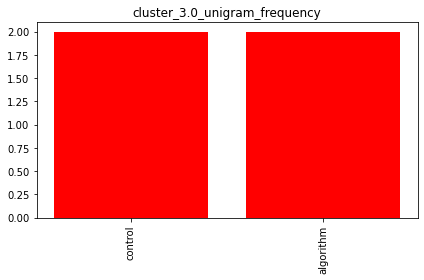

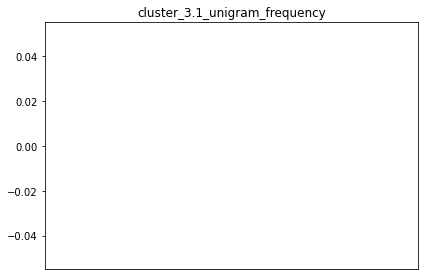

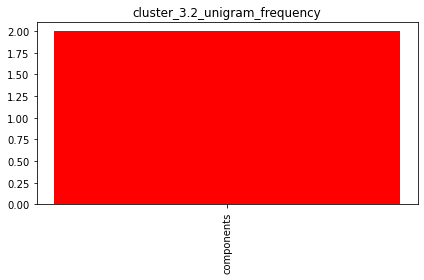

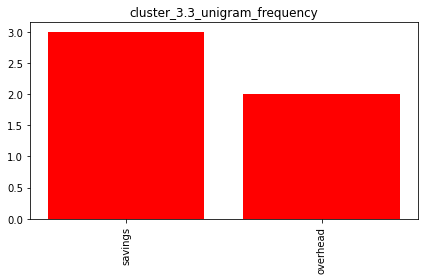

<Figure size 432x288 with 0 Axes>

In [244]:
# cluster 3 sub clusters unigrams
plot_cluster_phrase_ngrams(cluster3_uni_freq, cl3_uni_fig_names, cl3_uni_titles, 6, 'r')

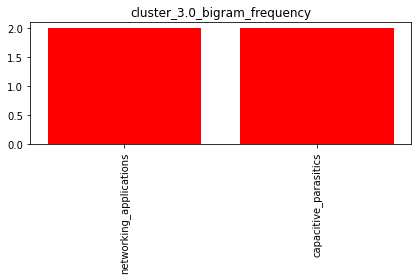

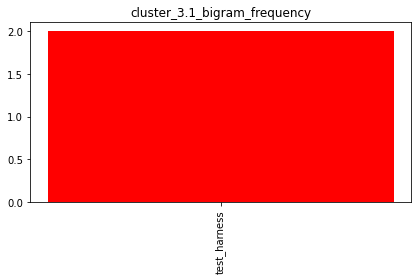

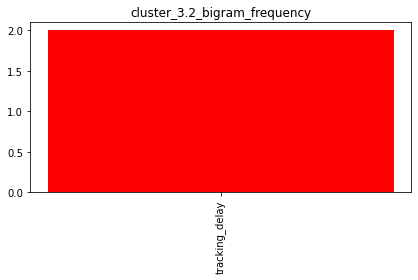

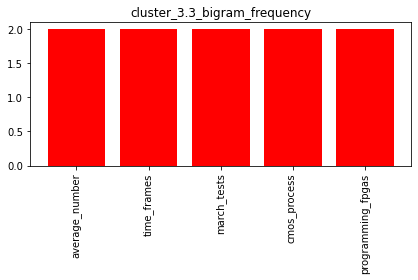

<Figure size 432x288 with 0 Axes>

In [245]:
# cluster 3 sub clusters bigrams
plot_cluster_phrase_ngrams(cluster3_bi_freq, cl3_bi_fig_names, cl3_bi_titles, 6, 'r')

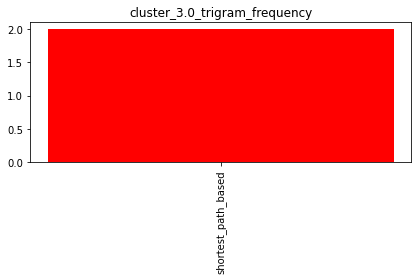

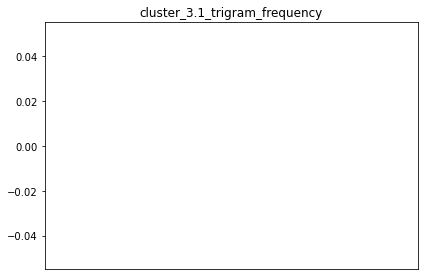

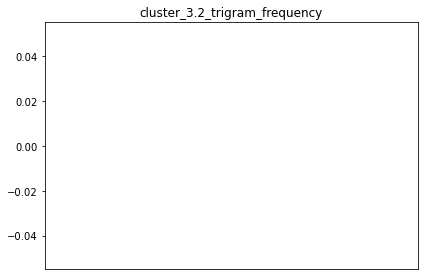

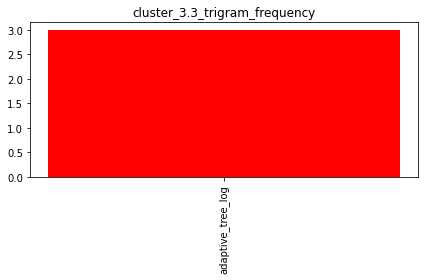

<Figure size 432x288 with 0 Axes>

In [246]:
# cluster 3 sub clusters trigrams
plot_cluster_phrase_ngrams(cluster3_tri_freq, cl3_tri_fig_names, cl3_tri_titles, 6, 'r')

#### cluster4

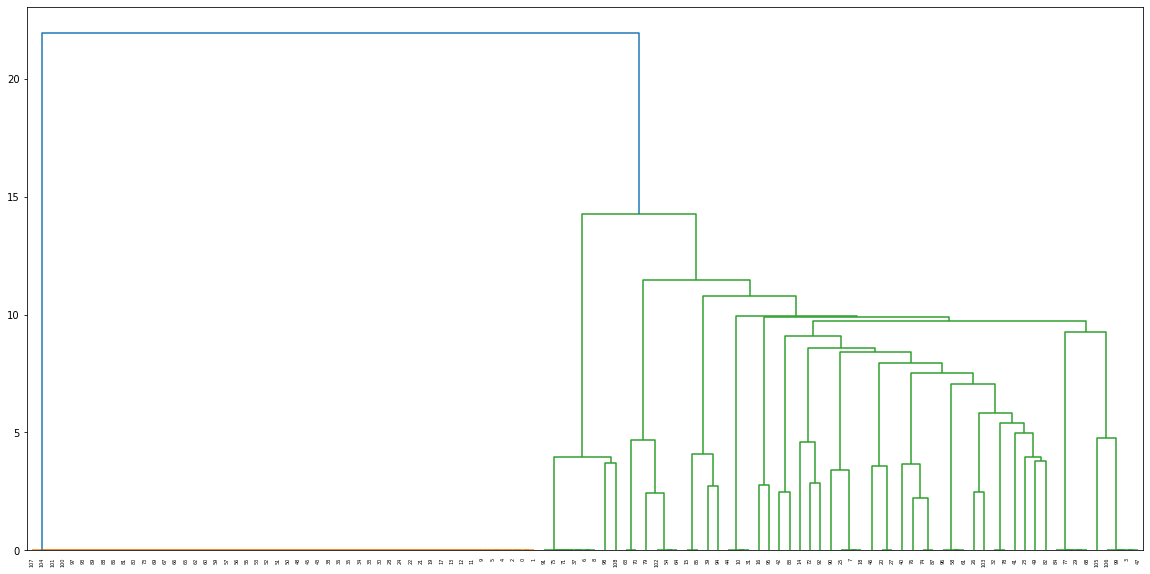

In [247]:
Z4 = plot_subtree_dendrogram(agg_tf_cluster_vectors[4], "ward")

In [260]:
# threshold around 13, around 4 clusters 
agg_model_cl4, cl4_res = agg_clustering(4, agg_tf_cluster_vectors[4])
cluster_4_doc_idx, cluster_4_doc_cnt, cluster_4_vectors, cluster_4_text = get_agg_cluster_data(cl4_res)
cluster_4_most_common_phrases = get_most_common_phrases_freq(cluster_4_text)
cluster4_uni_freq, cluster4_bi_freq, cluster4_tri_freq = get_cluster_ngrams(cluster_4_most_common_phrases)
cl4_uni_fig_names, cl4_uni_titles, cl4_bi_fig_names, cl4_bi_titles, cl4_tri_fig_names, cl4_tri_titles = get_ngrams_fig_names_titles(cluster4_uni_freq,cluster4_bi_freq, cluster4_tri_freq,True, "4.")

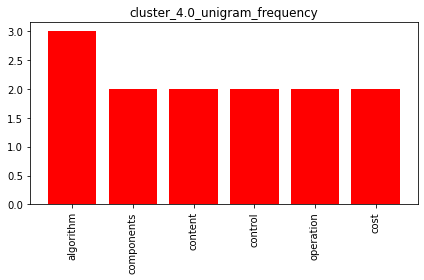

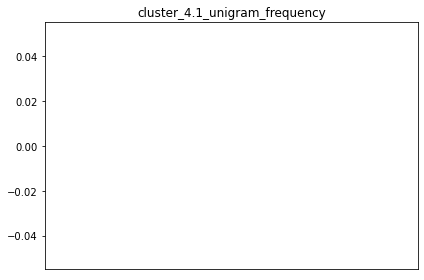

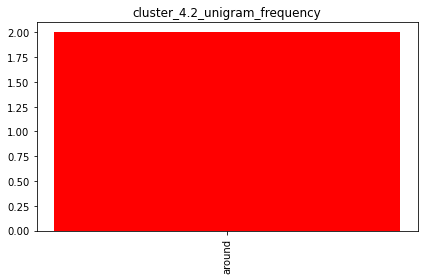

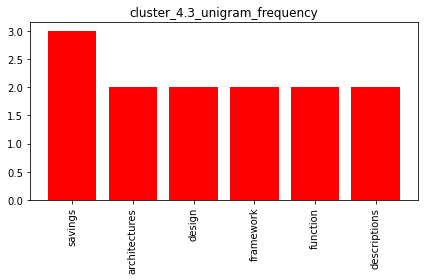

<Figure size 432x288 with 0 Axes>

In [249]:
# cluster 4 sub clusters unigrams
plot_cluster_phrase_ngrams(cluster4_uni_freq, cl4_uni_fig_names, cl4_uni_titles, 6, 'r')

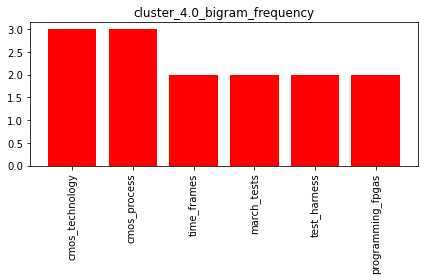

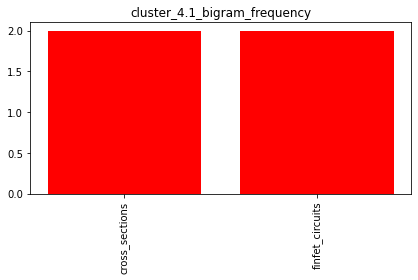

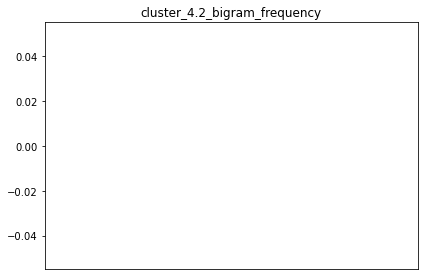

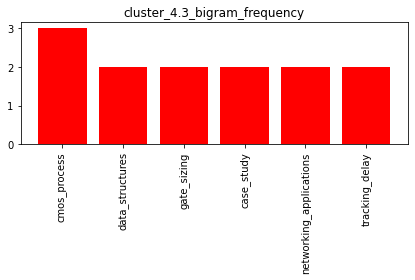

<Figure size 432x288 with 0 Axes>

In [250]:
# cluster 4 sub clusters bigrams
plot_cluster_phrase_ngrams(cluster4_bi_freq, cl4_bi_fig_names, cl4_bi_titles, 6, 'r')

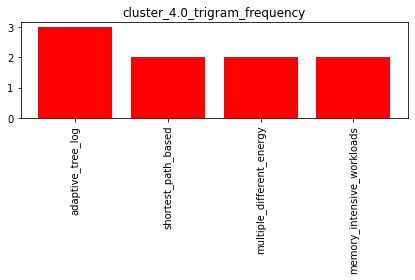

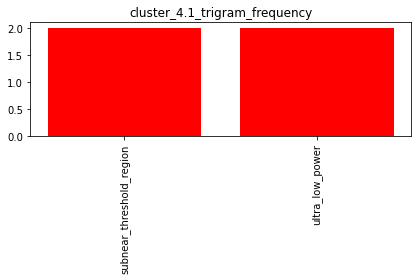

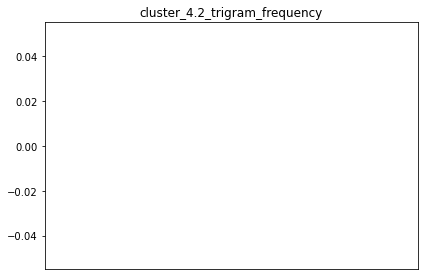

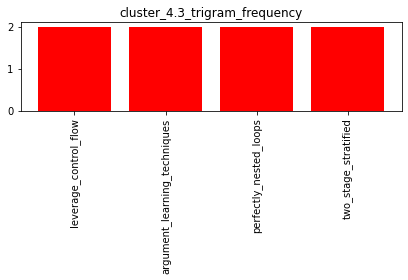

<Figure size 432x288 with 0 Axes>

In [251]:
# cluster 4 sub clusters trigrams
plot_cluster_phrase_ngrams(cluster4_tri_freq, cl4_tri_fig_names, cl4_tri_titles, 6, 'r')

#### cluster5

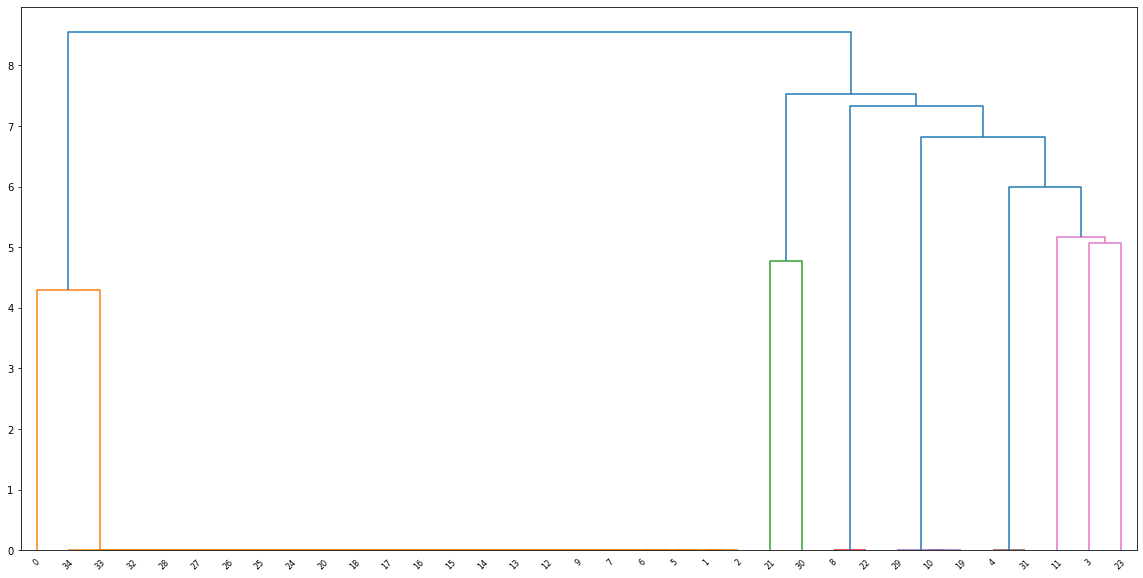

In [252]:
Z5 = plot_subtree_dendrogram(agg_tf_cluster_vectors[5], "ward")

In [253]:
# threshold around 7, around 4 clusters 
agg_model_cl5, cl5_res = agg_clustering(4, agg_tf_cluster_vectors[5])
cluster_5_doc_idx, cluster_5_doc_cnt, cluster_5_vectors, cluster_5_text = get_agg_cluster_data(cl5_res)
cluster_5_most_common_phrases = get_most_common_phrases_freq(cluster_5_text)
cluster5_uni_freq, cluster5_bi_freq, cluster5_tri_freq = get_cluster_ngrams(cluster_5_most_common_phrases)
cl5_uni_fig_names, cl5_uni_titles, cl5_bi_fig_names, cl5_bi_titles, cl5_tri_fig_names, cl5_tri_titles = get_ngrams_fig_names_titles(cluster5_uni_freq,cluster5_bi_freq, cluster5_tri_freq,True, "5.")

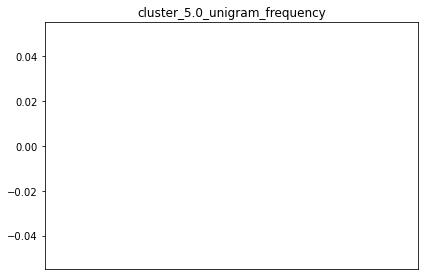

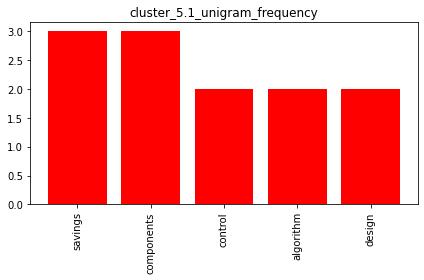

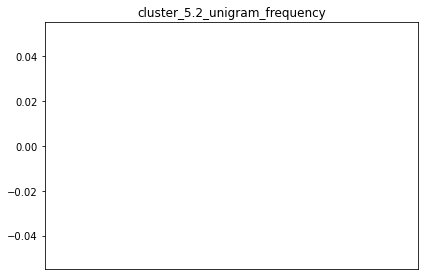

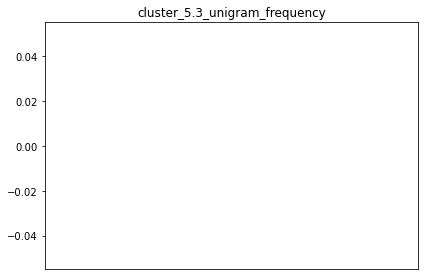

<Figure size 432x288 with 0 Axes>

In [254]:
# cluster 5 sub clusters unigrams
plot_cluster_phrase_ngrams(cluster5_uni_freq, cl5_uni_fig_names, cl5_uni_titles, 6, 'r')

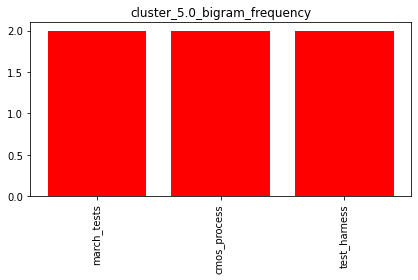

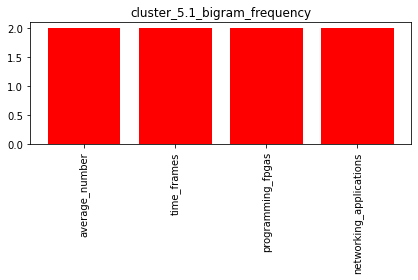

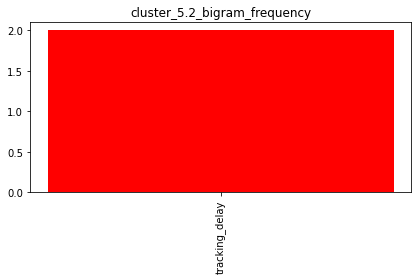

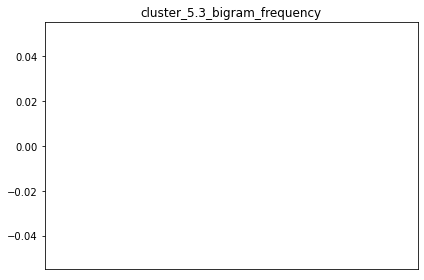

<Figure size 432x288 with 0 Axes>

In [255]:
# cluster 5 sub clusters bigrams
plot_cluster_phrase_ngrams(cluster5_bi_freq, cl5_bi_fig_names, cl5_bi_titles, 6, 'r')

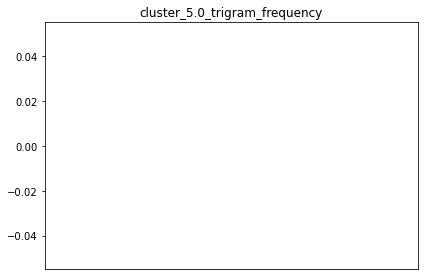

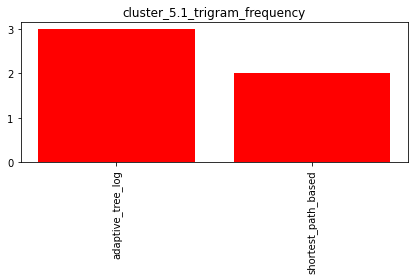

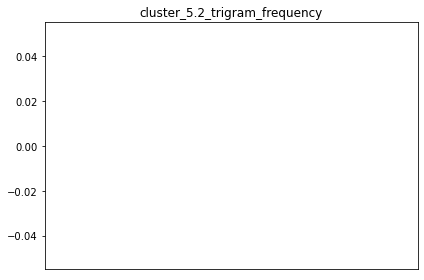

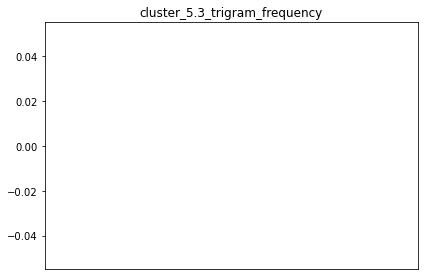

<Figure size 432x288 with 0 Axes>

In [256]:
# cluster 5 sub clusters trigrams
plot_cluster_phrase_ngrams(cluster5_tri_freq, cl5_tri_fig_names, cl5_tri_titles, 6, 'r')

#### cluster6

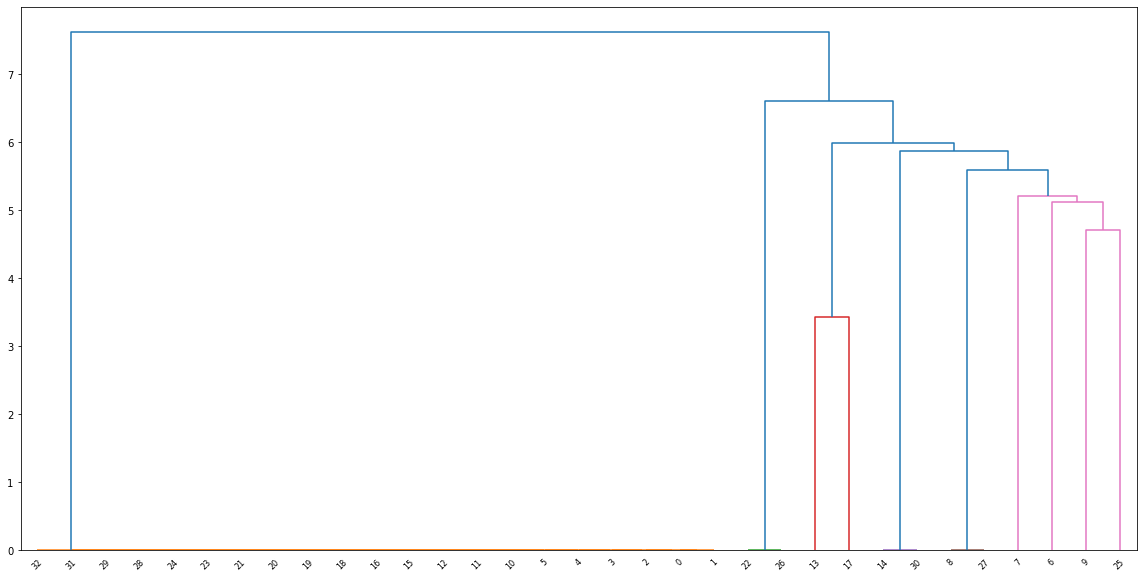

In [257]:
Z6 = plot_subtree_dendrogram(agg_tf_cluster_vectors[6], "ward")

In [259]:
# threshold around 6, around 3 clusters 
agg_model_cl6, cl6_res = agg_clustering(3, agg_tf_cluster_vectors[6])
cluster_6_doc_idx, cluster_6_doc_cnt, cluster_6_vectors, cluster_6_text = get_agg_cluster_data(cl6_res)
cluster_6_most_common_phrases = get_most_common_phrases_freq(cluster_6_text)
cluster6_uni_freq, cluster6_bi_freq, cluster6_tri_freq = get_cluster_ngrams(cluster_6_most_common_phrases)
cl6_uni_fig_names, cl6_uni_titles, cl6_bi_fig_names, cl6_bi_titles, cl6_tri_fig_names, cl6_tri_titles = get_ngrams_fig_names_titles(cluster6_uni_freq,cluster6_bi_freq, cluster6_tri_freq,True, "6.")

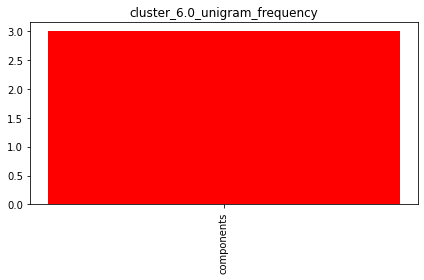

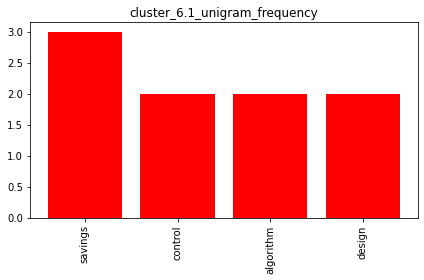

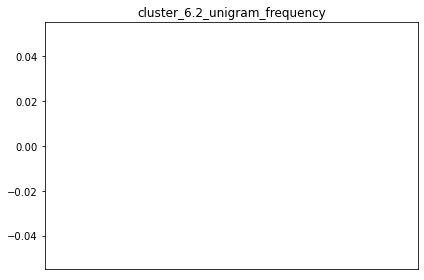

<Figure size 432x288 with 0 Axes>

In [261]:
# cluster 6 sub clusters unigrams
plot_cluster_phrase_ngrams(cluster6_uni_freq, cl6_uni_fig_names, cl6_uni_titles, 6, 'r')

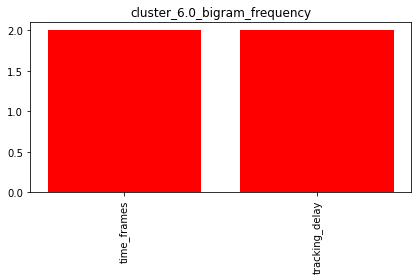

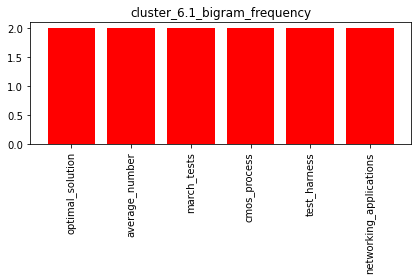

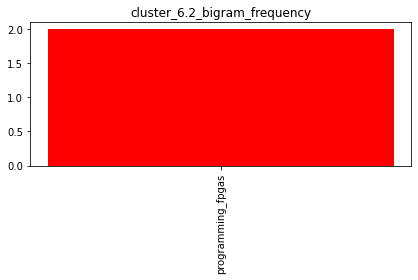

<Figure size 432x288 with 0 Axes>

In [262]:
plot_cluster_phrase_ngrams(cluster6_bi_freq, cl6_bi_fig_names, cl6_bi_titles, 6, 'r')

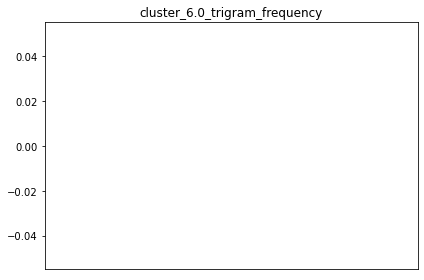

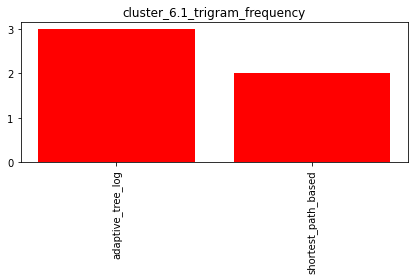

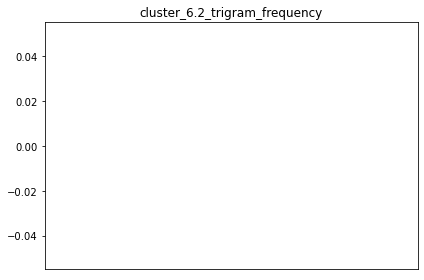

<Figure size 432x288 with 0 Axes>

In [263]:
plot_cluster_phrase_ngrams(cluster6_tri_freq, cl6_tri_fig_names, cl6_tri_titles, 6, 'r')

#### cluster7

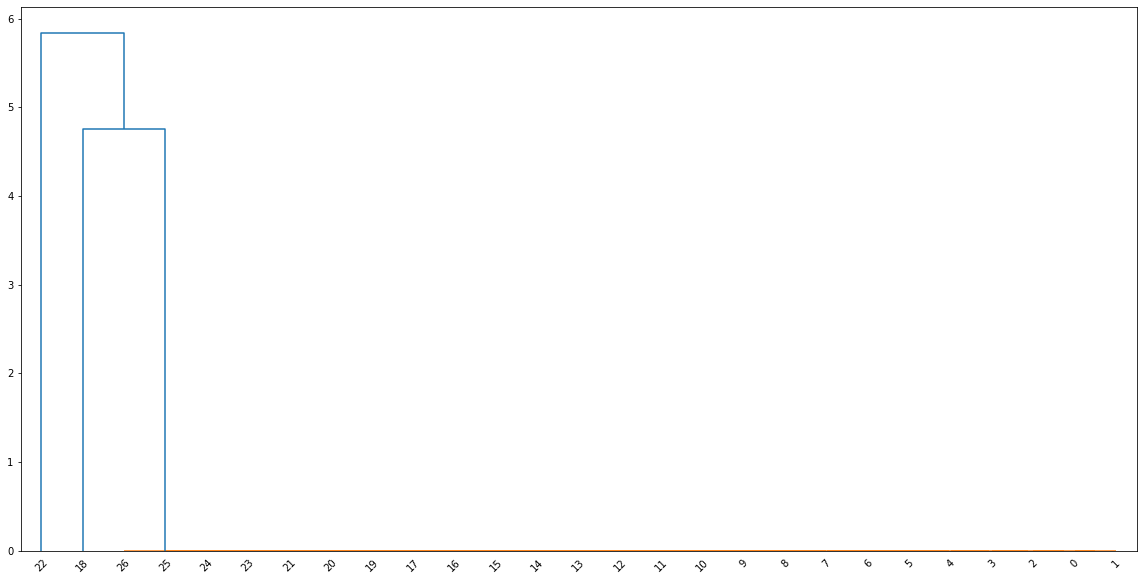

In [264]:
Z7 = plot_subtree_dendrogram(agg_tf_cluster_vectors[7], "ward")

In [265]:
# threshold around 4, around 3 clusters 
agg_model_cl7, cl7_res = agg_clustering(3, agg_tf_cluster_vectors[7])
cluster_7_doc_idx, cluster_7_doc_cnt, cluster_7_vectors, cluster_7_text = get_agg_cluster_data(cl7_res)
cluster_7_most_common_phrases = get_most_common_phrases_freq(cluster_7_text)
cluster7_uni_freq, cluster7_bi_freq, cluster7_tri_freq = get_cluster_ngrams(cluster_7_most_common_phrases)
cl7_uni_fig_names, cl7_uni_titles, cl7_bi_fig_names, cl7_bi_titles, cl7_tri_fig_names, cl7_tri_titles = get_ngrams_fig_names_titles(cluster7_uni_freq,cluster7_bi_freq, cluster7_tri_freq,True, "7.")

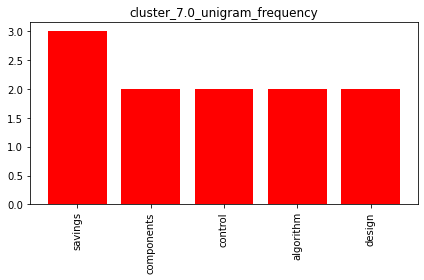

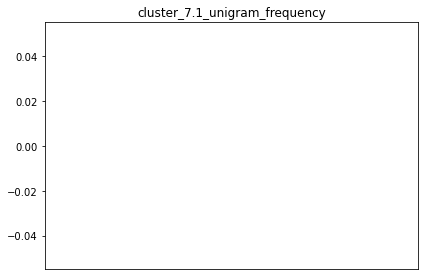

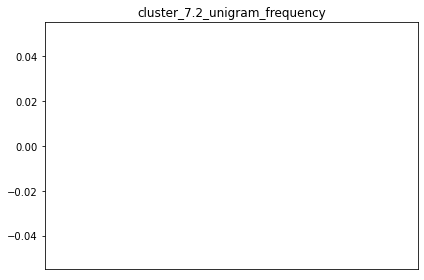

<Figure size 432x288 with 0 Axes>

In [266]:
# cluster 7 sub clusters unigrams
plot_cluster_phrase_ngrams(cluster7_uni_freq, cl7_uni_fig_names, cl7_uni_titles, 6, 'r')

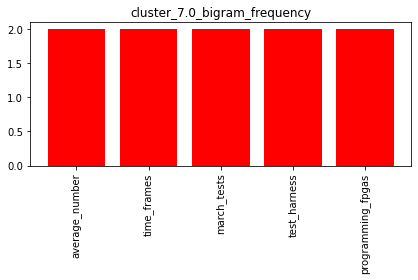

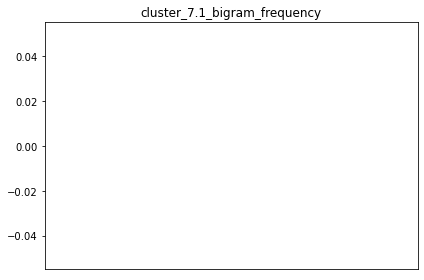

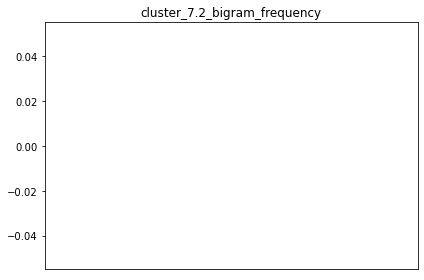

<Figure size 432x288 with 0 Axes>

In [267]:
# cluster 7 sub clusters bigrams
plot_cluster_phrase_ngrams(cluster7_bi_freq, cl7_bi_fig_names, cl7_bi_titles, 6, 'r')

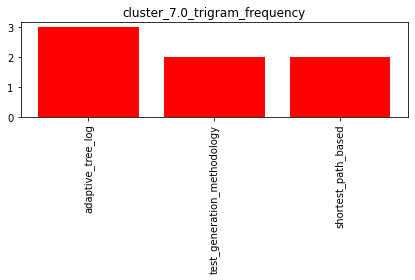

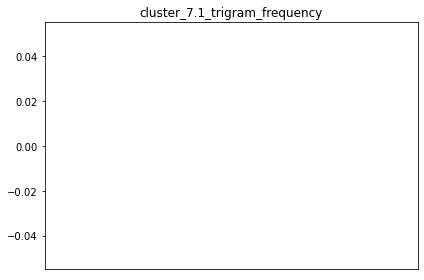

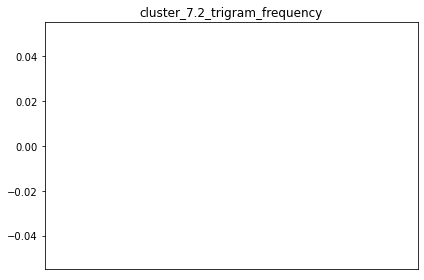

<Figure size 432x288 with 0 Axes>

In [268]:
# cluster 7 sub clusters trigrams
plot_cluster_phrase_ngrams(cluster7_tri_freq, cl7_tri_fig_names, cl7_tri_titles, 6, 'r')

#### cluster8

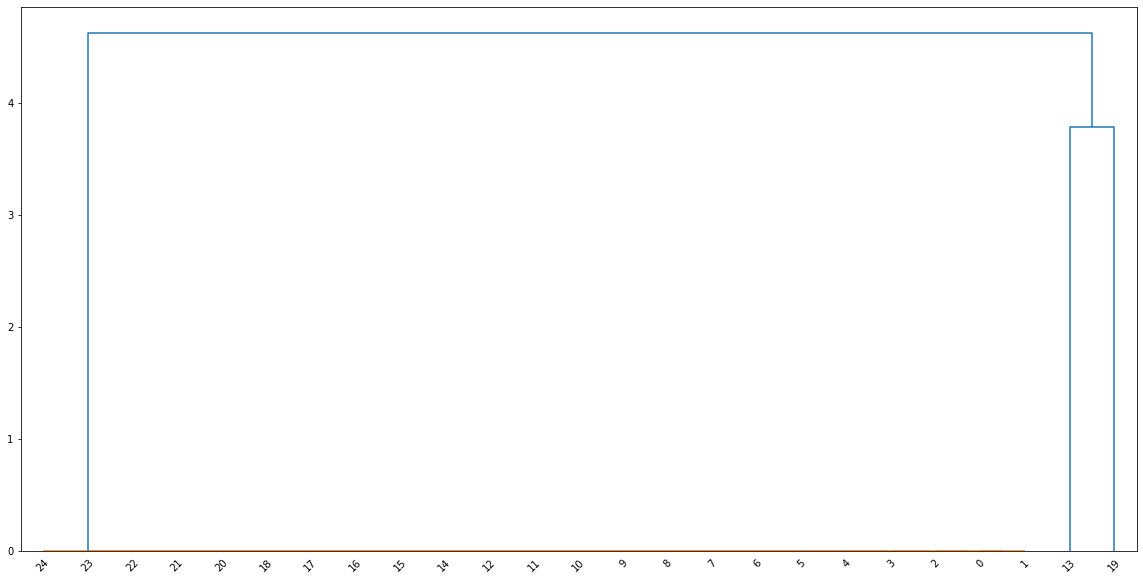

In [269]:
Z8 = plot_subtree_dendrogram(agg_tf_cluster_vectors[8], "ward")

In [270]:
# threshold around 3, around 3 clusters 
agg_model_cl8, cl8_res = agg_clustering(3, agg_tf_cluster_vectors[8])
cluster_8_doc_idx, cluster_8_doc_cnt, cluster_8_vectors, cluster_8_text = get_agg_cluster_data(cl8_res)
cluster_8_most_common_phrases = get_most_common_phrases_freq(cluster_8_text)
cluster8_uni_freq, cluster8_bi_freq, cluster8_tri_freq = get_cluster_ngrams(cluster_8_most_common_phrases)
cl8_uni_fig_names, cl8_uni_titles, cl8_bi_fig_names, cl8_bi_titles, cl8_tri_fig_names, cl8_tri_titles = get_ngrams_fig_names_titles(cluster8_uni_freq,cluster8_bi_freq, cluster8_tri_freq,True, "8.")

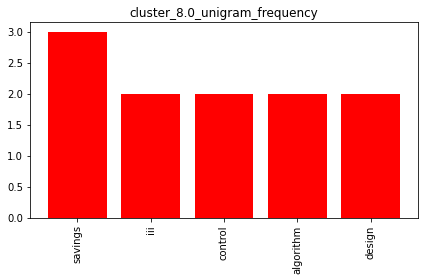

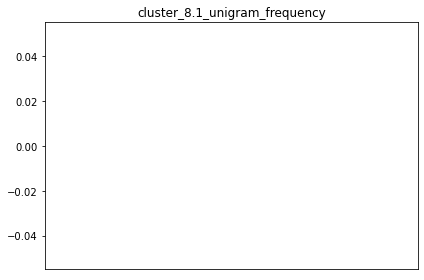

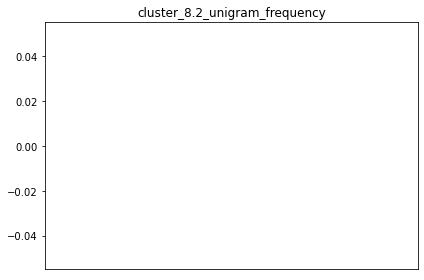

<Figure size 432x288 with 0 Axes>

In [271]:
# cluster 8 sub clusters unigrams
plot_cluster_phrase_ngrams(cluster8_uni_freq, cl8_uni_fig_names, cl8_uni_titles, 6, 'r')

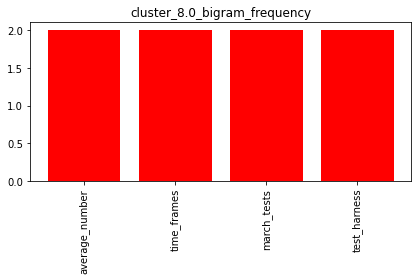

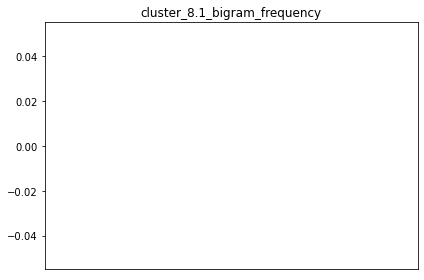

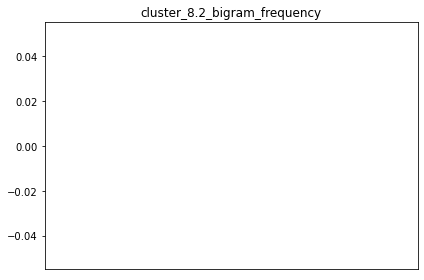

<Figure size 432x288 with 0 Axes>

In [272]:
# cluster 8 sub clusters bigrams
plot_cluster_phrase_ngrams(cluster8_bi_freq, cl8_bi_fig_names, cl8_bi_titles, 6, 'r')

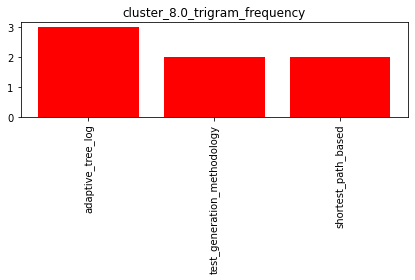

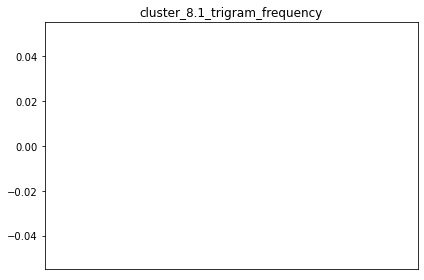

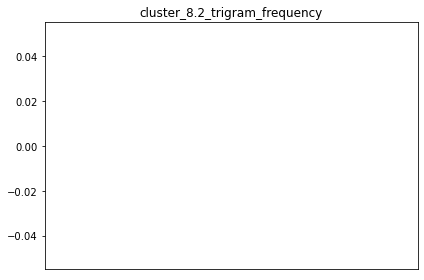

<Figure size 432x288 with 0 Axes>

In [273]:
# cluster 8 sub clusters trigrams
plot_cluster_phrase_ngrams(cluster8_tri_freq, cl8_tri_fig_names, cl8_tri_titles, 6, 'r')

#### cluster9

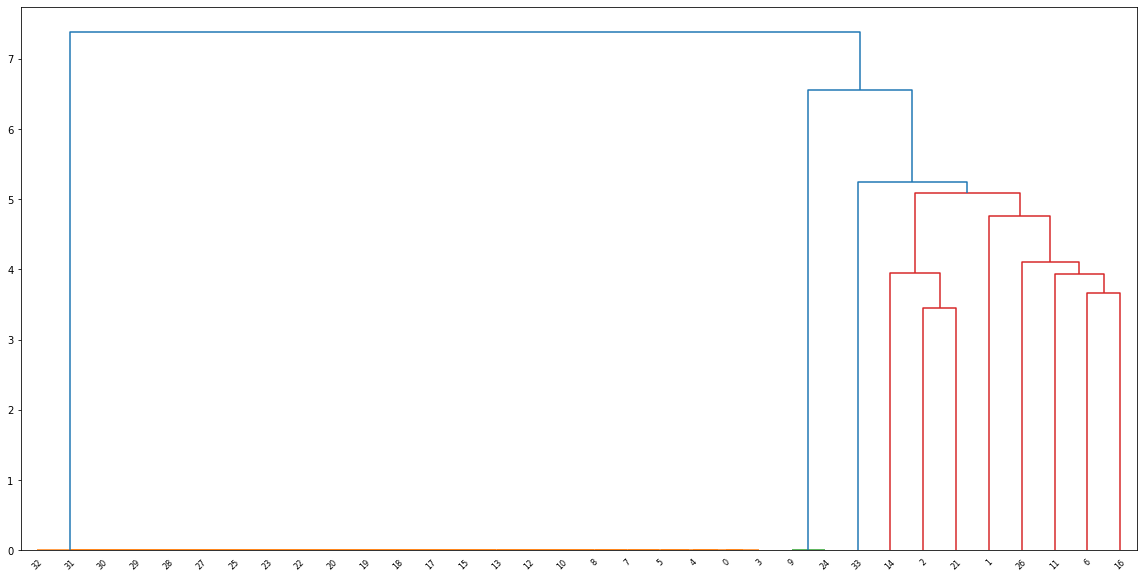

In [274]:
Z9 = plot_subtree_dendrogram(agg_tf_cluster_vectors[9], "ward")

In [275]:
# threshold around 6, around 3 clusters 
agg_model_cl9, cl9_res = agg_clustering(3, agg_tf_cluster_vectors[9])
cluster_9_doc_idx, cluster_9_doc_cnt, cluster_9_vectors, cluster_9_text = get_agg_cluster_data(cl9_res)
cluster_9_most_common_phrases = get_most_common_phrases_freq(cluster_9_text)
cluster9_uni_freq, cluster9_bi_freq, cluster9_tri_freq = get_cluster_ngrams(cluster_9_most_common_phrases)
cl9_uni_fig_names, cl9_uni_titles, cl9_bi_fig_names, cl9_bi_titles, cl9_tri_fig_names, cl9_tri_titles = get_ngrams_fig_names_titles(cluster9_uni_freq,cluster9_bi_freq, cluster9_tri_freq,True, "9.")

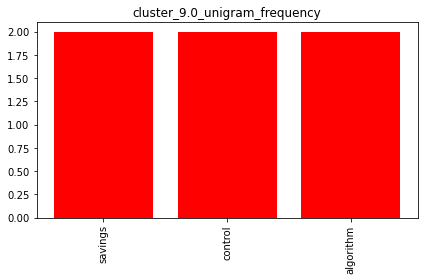

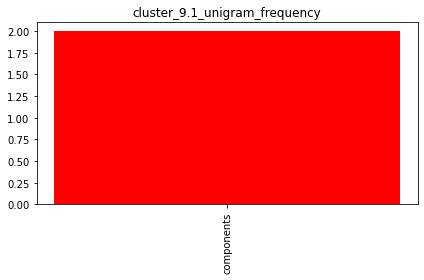

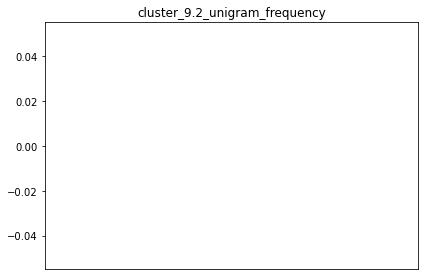

<Figure size 432x288 with 0 Axes>

In [276]:
# cluster 9 sub clusters unigrams
plot_cluster_phrase_ngrams(cluster9_uni_freq, cl9_uni_fig_names, cl9_uni_titles, 6, 'r')

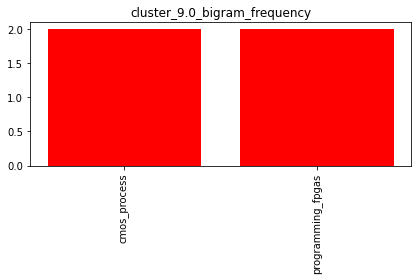

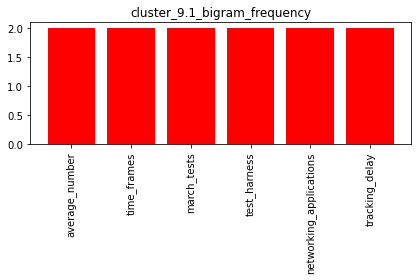

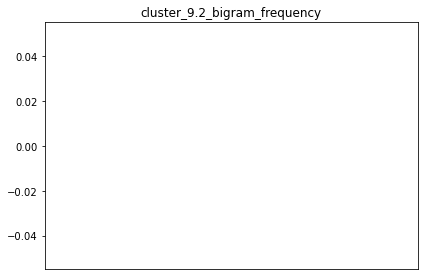

<Figure size 432x288 with 0 Axes>

In [278]:
# cluster 9 sub clusters bigrams
plot_cluster_phrase_ngrams(cluster9_bi_freq, cl9_bi_fig_names, cl9_bi_titles, 6, 'r')

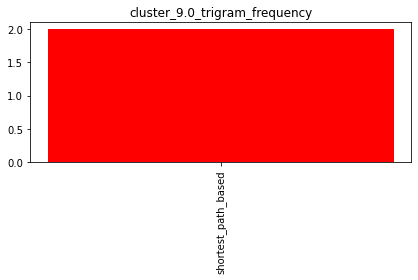

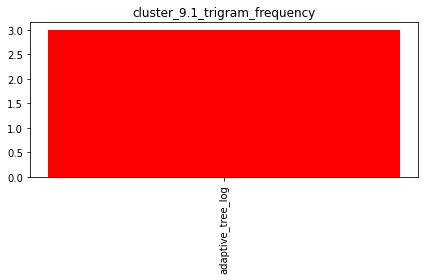

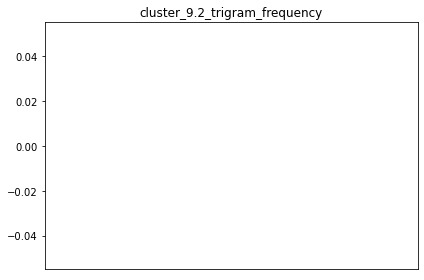

<Figure size 432x288 with 0 Axes>

In [279]:
# cluster 9 sub clusters trigrams
plot_cluster_phrase_ngrams(cluster9_tri_freq, cl9_tri_fig_names, cl9_tri_titles, 6, 'r')

#### cluster10

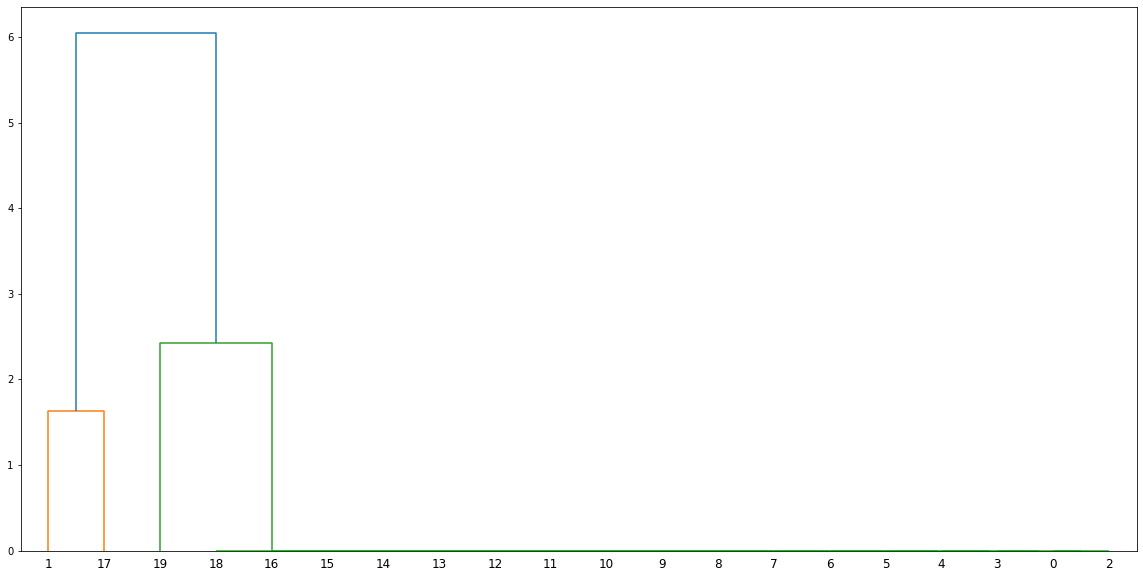

In [277]:
Z10 = plot_subtree_dendrogram(agg_tf_cluster_vectors[10], "ward")

In [280]:
# threshold around 4, around 2 clusters 
agg_model_cl10, cl10_res = agg_clustering(2, agg_tf_cluster_vectors[10])
cluster_10_doc_idx, cluster_10_doc_cnt, cluster_10_vectors, cluster_10_text = get_agg_cluster_data(cl10_res)
cluster_10_most_common_phrases = get_most_common_phrases_freq(cluster_10_text)
cluster10_uni_freq, cluster10_bi_freq, cluster10_tri_freq = get_cluster_ngrams(cluster_10_most_common_phrases)
cl10_uni_fig_names, cl10_uni_titles, cl10_bi_fig_names, cl10_bi_titles, cl10_tri_fig_names, cl10_tri_titles = get_ngrams_fig_names_titles(cluster10_uni_freq,cluster10_bi_freq, cluster10_tri_freq,True, "10.")

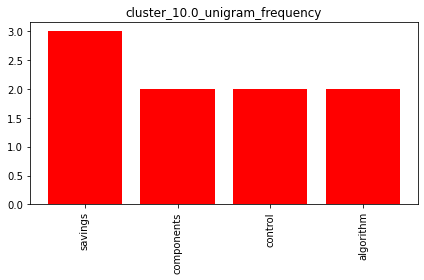

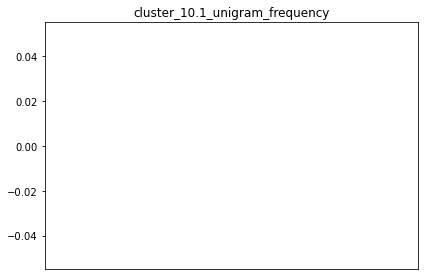

<Figure size 432x288 with 0 Axes>

In [281]:
# cluster 10 sub clusters unigrams
plot_cluster_phrase_ngrams(cluster10_uni_freq, cl10_uni_fig_names, cl10_uni_titles, 6, 'r')

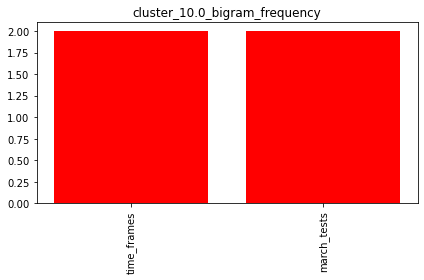

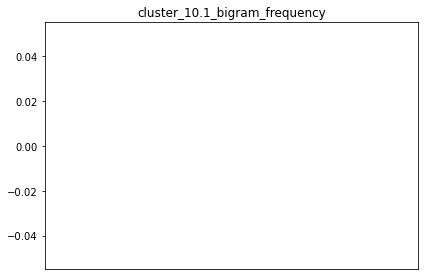

<Figure size 432x288 with 0 Axes>

In [283]:
# cluster 10 sub clusters bigrams
plot_cluster_phrase_ngrams(cluster10_bi_freq, cl10_bi_fig_names, cl10_bi_titles, 6, 'r')

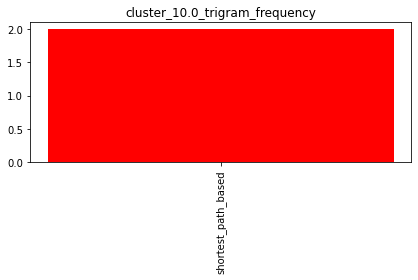

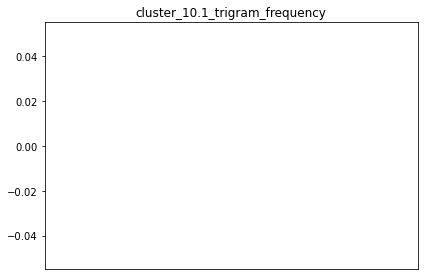

<Figure size 432x288 with 0 Axes>

In [284]:
# cluster 10 sub clusters trigrams
plot_cluster_phrase_ngrams(cluster10_tri_freq, cl10_tri_fig_names, cl10_tri_titles, 6, 'r')

#### cluster11

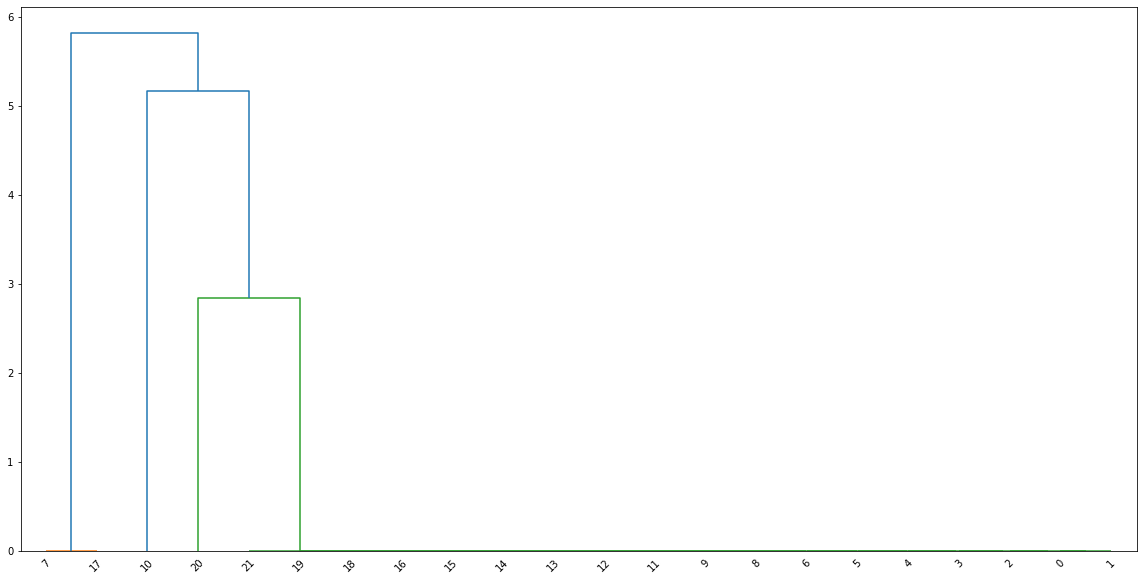

In [285]:
Z11 = plot_subtree_dendrogram(agg_tf_cluster_vectors[11], "ward")

In [286]:
# threshold around 4, around 3 clusters 
agg_model_cl11, cl11_res = agg_clustering(3, agg_tf_cluster_vectors[11])
cluster_11_doc_idx, cluster_11_doc_cnt, cluster_11_vectors, cluster_11_text = get_agg_cluster_data(cl11_res)
cluster_11_most_common_phrases = get_most_common_phrases_freq(cluster_11_text)
cluster11_uni_freq, cluster11_bi_freq, cluster11_tri_freq = get_cluster_ngrams(cluster_11_most_common_phrases)
cl11_uni_fig_names, cl11_uni_titles, cl11_bi_fig_names, cl11_bi_titles, cl11_tri_fig_names, cl11_tri_titles = get_ngrams_fig_names_titles(cluster11_uni_freq,cluster11_bi_freq, cluster11_tri_freq,True, "11.")

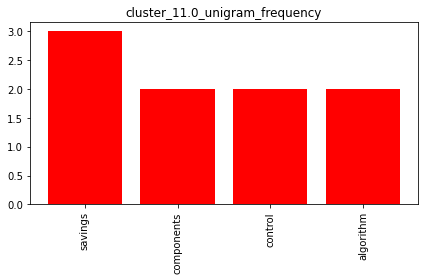

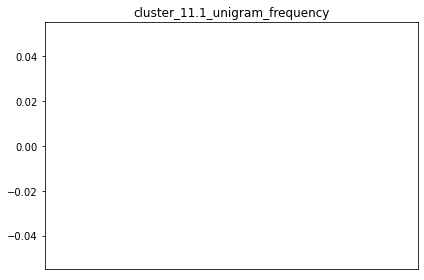

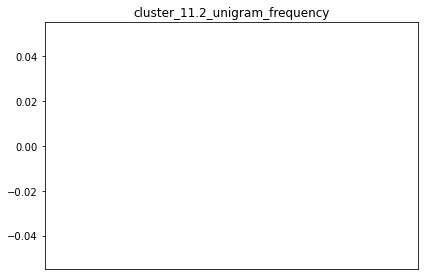

<Figure size 432x288 with 0 Axes>

In [287]:
# cluster 11 sub clusters unigrams
plot_cluster_phrase_ngrams(cluster11_uni_freq, cl11_uni_fig_names, cl11_uni_titles, 6, 'r')

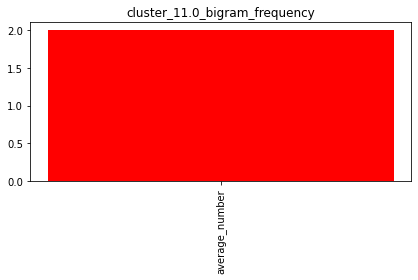

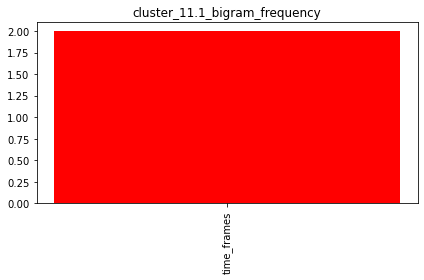

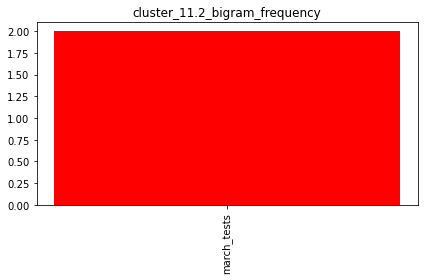

<Figure size 432x288 with 0 Axes>

In [288]:
# cluster 11 sub clusters bigrams
plot_cluster_phrase_ngrams(cluster11_bi_freq, cl11_bi_fig_names, cl11_bi_titles, 6, 'r')

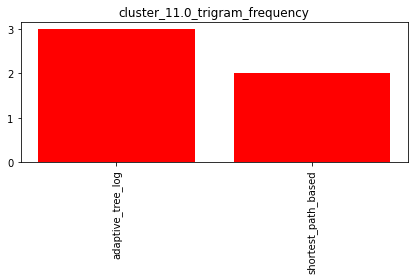

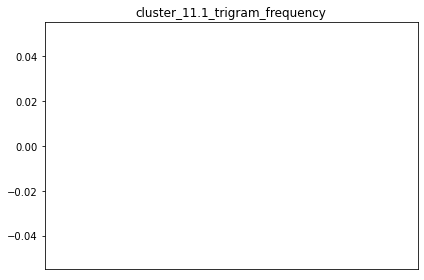

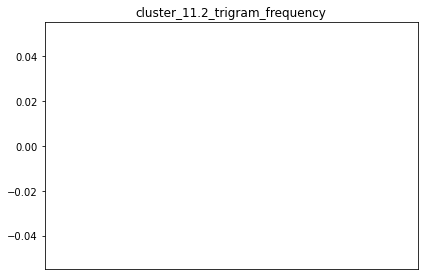

<Figure size 432x288 with 0 Axes>

In [289]:
# cluster 11 sub clusters trigrams
plot_cluster_phrase_ngrams(cluster11_tri_freq, cl11_tri_fig_names, cl11_tri_titles, 6, 'r')

#### cluster12

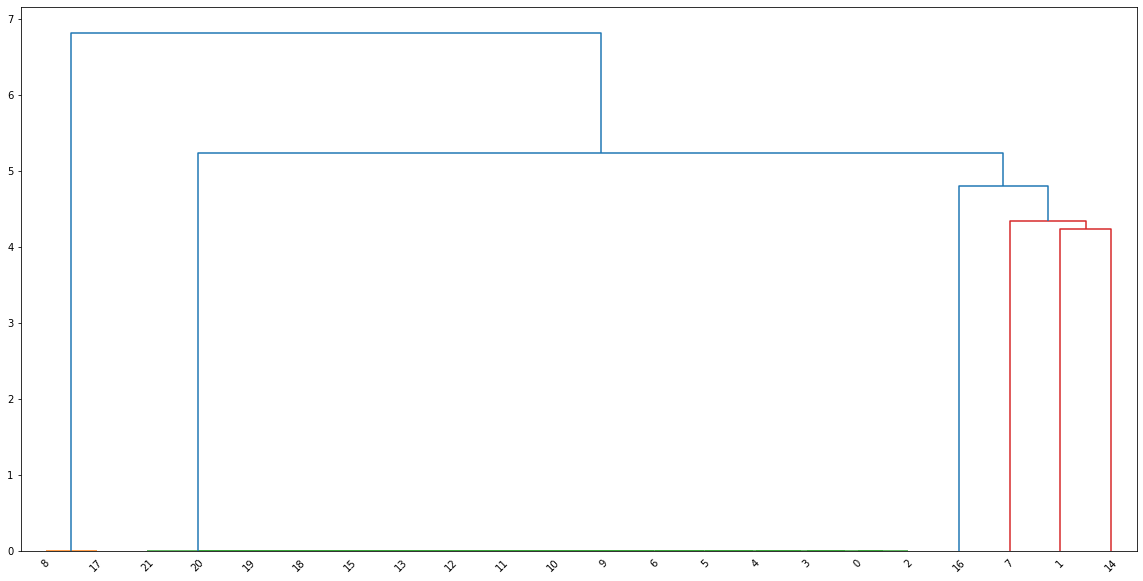

In [290]:
Z12 = plot_subtree_dendrogram(agg_tf_cluster_vectors[12], "ward")

In [291]:
# threshold around 4.5, around 4 clusters 
agg_model_cl12, cl12_res = agg_clustering(4, agg_tf_cluster_vectors[12])
cluster_12_doc_idx, cluster_12_doc_cnt, cluster_12_vectors, cluster_12_text = get_agg_cluster_data(cl12_res)
cluster_12_most_common_phrases = get_most_common_phrases_freq(cluster_12_text)
cluster12_uni_freq, cluster12_bi_freq, cluster12_tri_freq = get_cluster_ngrams(cluster_12_most_common_phrases)
cl12_uni_fig_names, cl12_uni_titles, cl12_bi_fig_names, cl12_bi_titles, cl12_tri_fig_names, cl12_tri_titles = get_ngrams_fig_names_titles(cluster12_uni_freq,cluster12_bi_freq, cluster12_tri_freq,True, "12.")

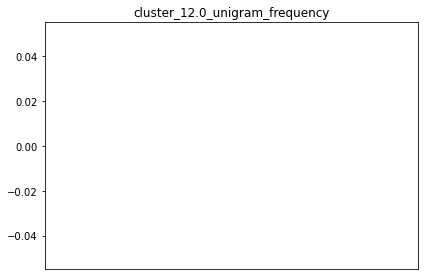

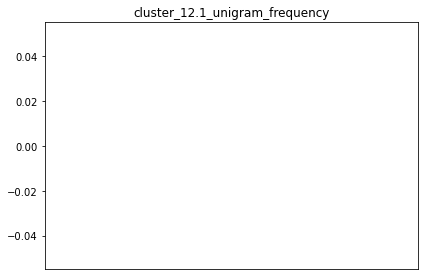

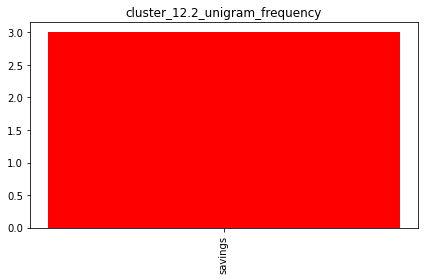

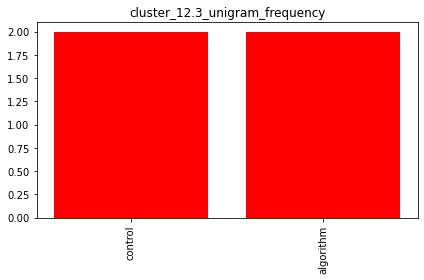

<Figure size 432x288 with 0 Axes>

In [292]:
# cluster 12 sub clusters unigrams
plot_cluster_phrase_ngrams(cluster12_uni_freq, cl12_uni_fig_names, cl12_uni_titles, 6, 'r')

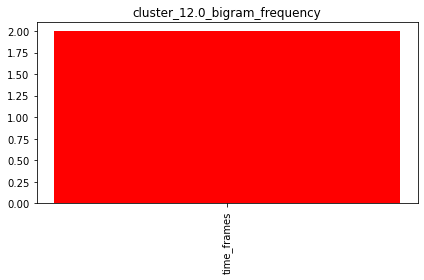

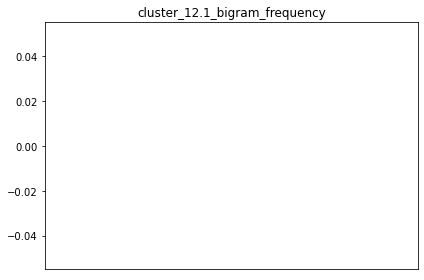

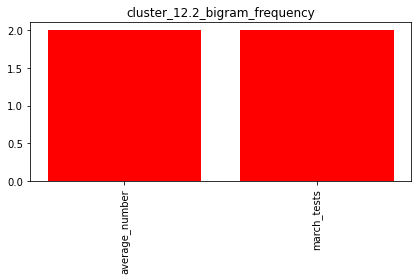

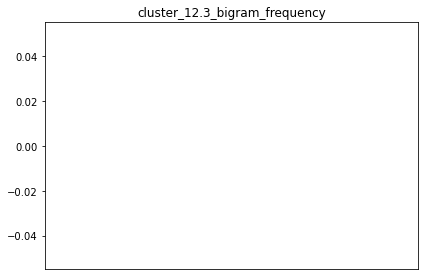

<Figure size 432x288 with 0 Axes>

In [293]:
# cluster 12 sub clusters bigrams
plot_cluster_phrase_ngrams(cluster12_bi_freq, cl12_bi_fig_names, cl12_bi_titles, 6, 'r')

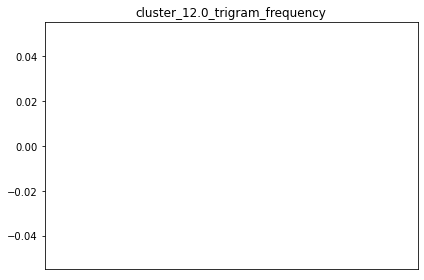

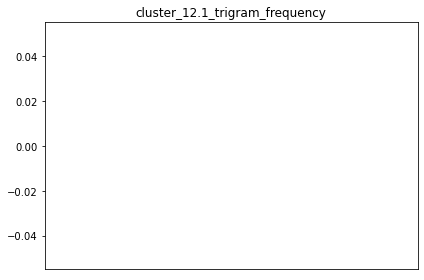

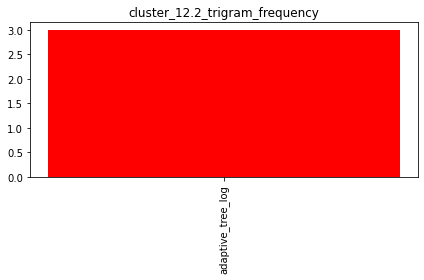

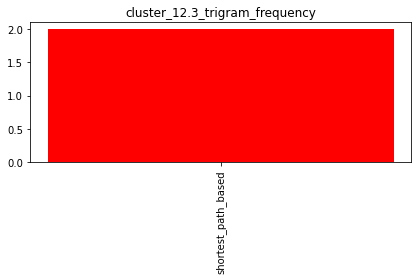

<Figure size 432x288 with 0 Axes>

In [294]:
# cluster 12 sub clusters trigrams
plot_cluster_phrase_ngrams(cluster12_tri_freq, cl12_tri_fig_names, cl12_tri_titles, 6, 'r')